# **0.-Importamos las librerías a usar**

In [1]:
!pip install lightgbm

In [2]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import gc
import lightgbm as lgb
from scipy import sparse
from scipy.sparse.linalg import svds
from sklearn.metrics import roc_auc_score
from scipy.sparse import csr_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from statistics import mode 


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# **1.Leer los datos del dataset**
## Leer los datos del dataset

In [4]:
 #importa datos


In [5]:
datos = pd.read_excel("C:/Users/avelasque/Documents/clientesBM/CLIENTE.xlsx") #base exportada

In [6]:
datos.head(20) #vista

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,...,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente
0,514,35,1703.0,M,S,N,AREQUIPA,74.13,0,NaN,...,0,0,0.0,0,0,0,133.20,8.0,66.00,MALO
1,728,29,NaN,M,S,C,LIMA,74.10,0,NaN,...,20,51,0.0,1,0,2,772.69,32.0,225.26,MALO
2,2387,25,850.0,F,S,C,LIMA,53.30,0,NaN,...,46,0,0.0,0,0,3,653.89,10.0,526.30,MALO
3,3445,31,NaN,M,S,D,LIMA,73.90,1,1.0,...,10,11,0.0,0,0,4,1354.32,19.0,468.00,MALO
4,6536,35,NaN,M,S,N,LA LIBERTAD,73.70,0,NaN,...,36,67,0.0,1,2,2,459.10,3.0,439.20,MALO
5,7355,43,2957.0,M,S,C,LIMA,73.67,0,NaN,...,64,6,0.0,0,0,3,1806.98,37.0,1077.28,MALO
6,9164,32,800.0,F,S,N,PIURA,73.57,0,NaN,...,61,31,0.0,0,0,3,4088.74,65.0,1289.00,MALO
7,14111,31,550.0,F,S,D,LIMA,73.30,0,NaN,...,25,56,400.0,0,1,3,658.97,17.0,305.50,MALO
8,15541,40,NaN,M,S,N,PIURA,58.63,0,NaN,...,31,62,0.0,0,0,2,213.14,15.0,129.50,MALO
9,18808,26,NaN,F,S,C,LIMA,72.93,1,2.0,...,110,110,0.0,0,0,4,121.65,3.0,61.80,MALO


# Identifique número de filas y columnas

In [7]:
print("Número de filas : ",str(datos.shape[0]),"y Número de columnas : " ,str(datos.shape[1])) #tamaño de filas y columnas

Número de filas :  20 y Número de columnas :  42


# Extraiga una lista de los atributos.

In [8]:
print('Atributos del dataset')
datos.info() #muestra tipo de datos

Atributos del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 42 columns):
Cliente                                20 non-null int64
Edad                                   20 non-null int64
Renta                                  11 non-null float64
Sexo                                   20 non-null object
EstadoCivil                            20 non-null object
NivelSocioEconomico                    20 non-null object
Departamento                           20 non-null object
AntiguedadCuenta_Meses                 20 non-null float64
RegistraAdicionales                    20 non-null int64
NumeroAdicionales                      6 non-null float64
AntiguedadAdicionales_Meses            6 non-null float64
LineaCreditoNormal                     20 non-null int64
SituacionCuenta                        20 non-null int64
PromediodePagos                        20 non-null object
SaldoExtra                             20 non-null int64
SaldoNorm

# **2.Frecuencia Incial**
Determinar la frecuencia de BUENOS y MALOS en los datos, de tal forma que se puede armar muestras. Calcule el nivel de entropía e interprete los resultados.

In [9]:
 #flag_cliente, muestra los atributos en base al numero de veces que se repiten
datos['Flag_Cliente'].value_counts()

MALO    20
Name: Flag_Cliente, dtype: int64

In [10]:
100 * datos['Flag_Cliente'].value_counts() / len(datos['Flag_Cliente']) #DATA MUY PEQUEÑA

MALO    100.0
Name: Flag_Cliente, dtype: float64

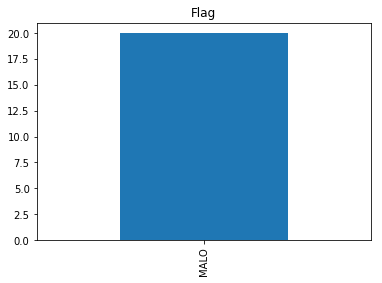

In [11]:
#ARMO GRÁFICOS EN BASE A LA CANTIDAD DE CLIENTES "BUENOS" Y "MALOS"

plot = datos['Flag_Cliente'].value_counts().plot(kind = 'bar', title = 'Flag')
#plot = datos['Flag_Cliente'].value_counts().plot(kind='bar',
      #                                      title='Flag Clientes')


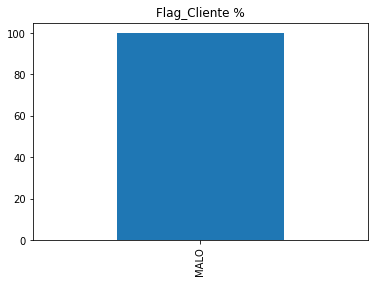

In [12]:
plot = (100 * datos['Flag_Cliente'].value_counts() / len(datos['Flag_Cliente'])).plot(
kind='bar', title='Flag_Cliente %') #determino el porcentaje

# **3.Muestreo Inicial**
Dividir los datos en dos grupos del 50% y 50% respectivamente, al que se denominara TRAIN y TEST.

In [14]:
Train,Test = train_test_split(datos, test_size=0.5, train_size=0.5,random_state=1982)
#necesito data entrenamiento y data prueba:
Train, Test = train_test_split(datos, test_size = 0.5, train_size= 0.5, random_state = 123) 


# **4.Balanceo de Datos**
Balancear los datos. Solo con los datos de TEST, maximize el tamaño de la muestra balanceada.

Solo se balancea el TRAIN y el TEST se deja igual.


In [15]:
Train.shape ,Test.shape

((10, 42), (10, 42))

In [16]:
#pd.value_counts(Train['Flag_Cliente']),pd.value_counts(Test['Flag_Cliente'])
pd.value_counts(Train['Flag_Cliente'])

MALO    10
Name: Flag_Cliente, dtype: int64

In [17]:
pd.value_counts(Test['Flag_Cliente'])

MALO    10
Name: Flag_Cliente, dtype: int64

In [18]:
#Train_Malo_undersampling=Train_Malo=Train.loc[Train.loc[:,'Flag_Cliente']=='MALO'].sample(n=1772, replace=False)
#Train_Malo_undersampling.shape

train_malo_check = train_malo=Train.loc[Train.loc[:,'Flag_Cliente'] == 'MALO'].sample(n = 10, replace = False)
train_malo #combinar datos

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,...,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente
1,728,29,NaN,M,S,C,LIMA,74.10,0,NaN,...,20,51,0.0,1,0,2,772.69,32.0,225.26,MALO
18,29077,29,NaN,M,S,B,LIMA,72.23,0,NaN,...,74,0,0.0,0,0,3,5974.01,61.0,1113.46,MALO
9,18808,26,NaN,F,S,C,LIMA,72.93,1,2.0,...,110,110,0.0,0,0,4,121.65,3.0,61.80,MALO
3,3445,31,NaN,M,S,D,LIMA,73.90,1,1.0,...,10,11,0.0,0,0,4,1354.32,19.0,468.00,MALO
16,24650,46,1780.0,M,S,A,LIMA,72.57,1,1.0,...,31,62,0.0,2,0,2,5359.51,78.0,859.00,MALO
6,9164,32,800.0,F,S,N,PIURA,73.57,0,NaN,...,61,31,0.0,0,0,3,4088.74,65.0,1289.00,MALO
13,23721,39,1230.0,F,S,C,LIMA,72.63,0,NaN,...,5,36,0.0,0,0,3,986.76,8.0,451.13,MALO
2,2387,25,850.0,F,S,C,LIMA,53.30,0,NaN,...,46,0,0.0,0,0,3,653.89,10.0,526.30,MALO
11,22569,31,NaN,M,S,N,PIURA,72.70,1,1.0,...,36,67,NaN,0,5,3,434.04,4.0,160.14,MALO
10,22187,33,NaN,M,C,D,LIMA,72.70,0,NaN,...,64,6,0.0,1,0,4,2124.21,14.0,1418.70,MALO


In [19]:
frames = [train_malo_check,Train.loc[Train.loc[:,'Flag_Cliente']=='BUENO']] #solo crea para combinar los frames
Train_Balanceado =pd.concat(frames) #aleatoriamente
Train_Balanceado #sigue siendo muy pequeño

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,...,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente
1,728,29,NaN,M,S,C,LIMA,74.10,0,NaN,...,20,51,0.0,1,0,2,772.69,32.0,225.26,MALO
18,29077,29,NaN,M,S,B,LIMA,72.23,0,NaN,...,74,0,0.0,0,0,3,5974.01,61.0,1113.46,MALO
9,18808,26,NaN,F,S,C,LIMA,72.93,1,2.0,...,110,110,0.0,0,0,4,121.65,3.0,61.80,MALO
3,3445,31,NaN,M,S,D,LIMA,73.90,1,1.0,...,10,11,0.0,0,0,4,1354.32,19.0,468.00,MALO
16,24650,46,1780.0,M,S,A,LIMA,72.57,1,1.0,...,31,62,0.0,2,0,2,5359.51,78.0,859.00,MALO
6,9164,32,800.0,F,S,N,PIURA,73.57,0,NaN,...,61,31,0.0,0,0,3,4088.74,65.0,1289.00,MALO
13,23721,39,1230.0,F,S,C,LIMA,72.63,0,NaN,...,5,36,0.0,0,0,3,986.76,8.0,451.13,MALO
2,2387,25,850.0,F,S,C,LIMA,53.30,0,NaN,...,46,0,0.0,0,0,3,653.89,10.0,526.30,MALO
11,22569,31,NaN,M,S,N,PIURA,72.70,1,1.0,...,36,67,NaN,0,5,3,434.04,4.0,160.14,MALO
10,22187,33,NaN,M,C,D,LIMA,72.70,0,NaN,...,64,6,0.0,1,0,4,2124.21,14.0,1418.70,MALO


In [20]:
pd.value_counts(Train_Balanceado['Flag_Cliente']) ##muestra total 

MALO    10
Name: Flag_Cliente, dtype: int64

# **5.Ranking de atributos**
Preparar el ranking de atributos solo con los datos balanceados (usar el operador weight). Solo con los datos balanceados.

# **6.Descripción de los datos**
Preparar la descripción de los datos, con estadística Univariada y multivarida, exponer los atributos en función al ranking de atributos, primero el más importante. Solo con los datos balanceados.

In [21]:
df_train=Train_Balanceado.copy() #copy() para que la data tenga identidad propia
df_train

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,...,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente
1,728,29,NaN,M,S,C,LIMA,74.10,0,NaN,...,20,51,0.0,1,0,2,772.69,32.0,225.26,MALO
18,29077,29,NaN,M,S,B,LIMA,72.23,0,NaN,...,74,0,0.0,0,0,3,5974.01,61.0,1113.46,MALO
9,18808,26,NaN,F,S,C,LIMA,72.93,1,2.0,...,110,110,0.0,0,0,4,121.65,3.0,61.80,MALO
3,3445,31,NaN,M,S,D,LIMA,73.90,1,1.0,...,10,11,0.0,0,0,4,1354.32,19.0,468.00,MALO
16,24650,46,1780.0,M,S,A,LIMA,72.57,1,1.0,...,31,62,0.0,2,0,2,5359.51,78.0,859.00,MALO
6,9164,32,800.0,F,S,N,PIURA,73.57,0,NaN,...,61,31,0.0,0,0,3,4088.74,65.0,1289.00,MALO
13,23721,39,1230.0,F,S,C,LIMA,72.63,0,NaN,...,5,36,0.0,0,0,3,986.76,8.0,451.13,MALO
2,2387,25,850.0,F,S,C,LIMA,53.30,0,NaN,...,46,0,0.0,0,0,3,653.89,10.0,526.30,MALO
11,22569,31,NaN,M,S,N,PIURA,72.70,1,1.0,...,36,67,NaN,0,5,3,434.04,4.0,160.14,MALO
10,22187,33,NaN,M,C,D,LIMA,72.70,0,NaN,...,64,6,0.0,1,0,4,2124.21,14.0,1418.70,MALO


In [22]:
feature_columns = {}
#select_dtypes es para agrupar variables de similar tipo de dato
feature_columns['categorical'] = df_train.select_dtypes(include = ['object']).columns.values.tolist() #tipos objetos
feature_columns['int'] = df_train.select_dtypes(include = ['integer']).columns.values.tolist() #todos los tipo enteros
feature_columns['float'] = df_train.select_dtypes(include = ['float32','float64']).columns.values.tolist() #los tipo float
feature_columns['numerical'] = feature_columns['int'] + feature_columns['float'] #la union de lista int y float
feature_columns["categorical"]
del feature_columns["categorical"][-1] #elimina la variable FLAG_CLIENTE
del feature_columns["numerical"][0] #ELIMINA EL idCliente
del feature_columns["int"][0]


In [24]:
df_train[feature_columns['numerical']]

,Edad,RegistraAdicionales,LineaCreditoNormal,SituacionCuenta,SaldoExtra,SaldoNormal,SaldoTotal,DiasMora200812,DiasMora200901,DiasMora200902,...,CalificacionSBS,Renta,AntiguedadCuenta_Meses,NumeroAdicionales,AntiguedadAdicionales_Meses,PeorHabito Pago,CódigoInstitucion,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905
1,29,0,1100,0,0,1405,1405,82,0,18,...,2,NaN,74.10,NaN,NaN,0.0,0.0,772.69,32.0,225.26
18,29,0,2400,0,967,2041,3008,0,0,13,...,3,NaN,72.23,NaN,NaN,NaN,0.0,5974.01,61.0,1113.46
9,26,1,400,5,0,848,848,112,113,110,...,4,NaN,72.93,2.0,35.93,NaN,0.0,121.65,3.0,61.80
3,31,1,600,5,0,443,443,41,42,70,...,4,NaN,73.90,1.0,13.10,0.0,0.0,1354.32,19.0,468.00
16,46,1,5040,5,325,6752,7077,1,1,0,...,2,1780.0,72.57,1.0,38.73,NaN,0.0,5359.51,78.0,859.00
6,32,0,3600,5,1008,3245,4253,0,1,0,...,3,800.0,73.57,NaN,NaN,NaN,0.0,4088.74,65.0,1289.00
13,39,0,1200,0,0,1275,1275,0,0,3,...,3,1230.0,72.63,NaN,NaN,NaN,0.0,986.76,8.0,451.13
2,25,0,600,0,0,2700,2700,0,16,44,...,3,850.0,53.30,NaN,NaN,0.0,0.0,653.89,10.0,526.30
11,31,1,3450,5,3782,5171,8953,6,6,0,...,3,NaN,72.70,1.0,50.90,NaN,NaN,434.04,4.0,160.14
10,33,0,500,5,0,513,513,0,0,3,...,4,NaN,72.70,NaN,NaN,NaN,0.0,2124.21,14.0,1418.70


In [25]:
Train_Balanceado=df_train.copy() #copia de df_train a train_balanceado

In [26]:
df_train=Train_Balanceado.copy() #vuelve a copiar?

In [27]:
Train_Balanceado=df_train.copy() #raro 
Train_Balanceado=Train_Balanceado.reset_index(drop=True) #resetea el index 0,1,2... 
Train_Balanceado

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,...,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,Flag_Cliente
0,728,29,NaN,M,S,C,LIMA,74.10,0,NaN,...,20,51,0.0,1,0,2,772.69,32.0,225.26,MALO
1,29077,29,NaN,M,S,B,LIMA,72.23,0,NaN,...,74,0,0.0,0,0,3,5974.01,61.0,1113.46,MALO
2,18808,26,NaN,F,S,C,LIMA,72.93,1,2.0,...,110,110,0.0,0,0,4,121.65,3.0,61.80,MALO
3,3445,31,NaN,M,S,D,LIMA,73.90,1,1.0,...,10,11,0.0,0,0,4,1354.32,19.0,468.00,MALO
4,24650,46,1780.0,M,S,A,LIMA,72.57,1,1.0,...,31,62,0.0,2,0,2,5359.51,78.0,859.00,MALO
5,9164,32,800.0,F,S,N,PIURA,73.57,0,NaN,...,61,31,0.0,0,0,3,4088.74,65.0,1289.00,MALO
6,23721,39,1230.0,F,S,C,LIMA,72.63,0,NaN,...,5,36,0.0,0,0,3,986.76,8.0,451.13,MALO
7,2387,25,850.0,F,S,C,LIMA,53.30,0,NaN,...,46,0,0.0,0,0,3,653.89,10.0,526.30,MALO
8,22569,31,NaN,M,S,N,PIURA,72.70,1,1.0,...,36,67,NaN,0,5,3,434.04,4.0,160.14,MALO
9,22187,33,NaN,M,C,D,LIMA,72.70,0,NaN,...,64,6,0.0,1,0,4,2124.21,14.0,1418.70,MALO


In [26]:
Train_Balanceado.loc[2:4,'Sexo']

2    M
3    F
4    M
Name: Sexo, dtype: object

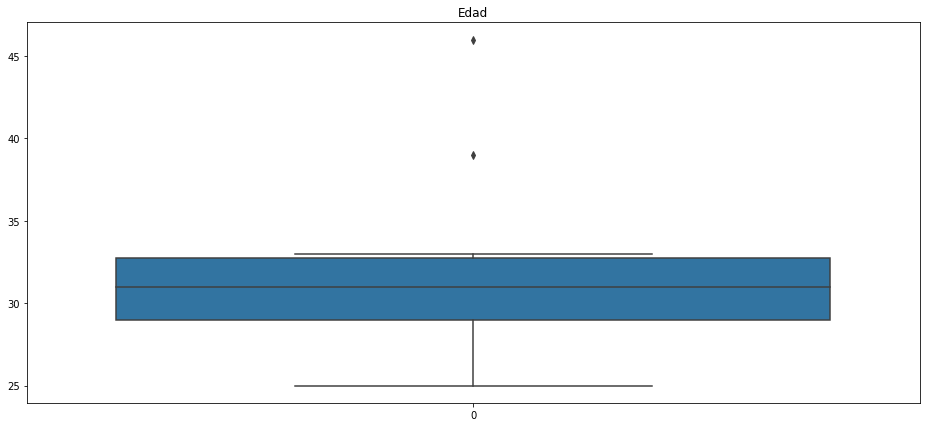

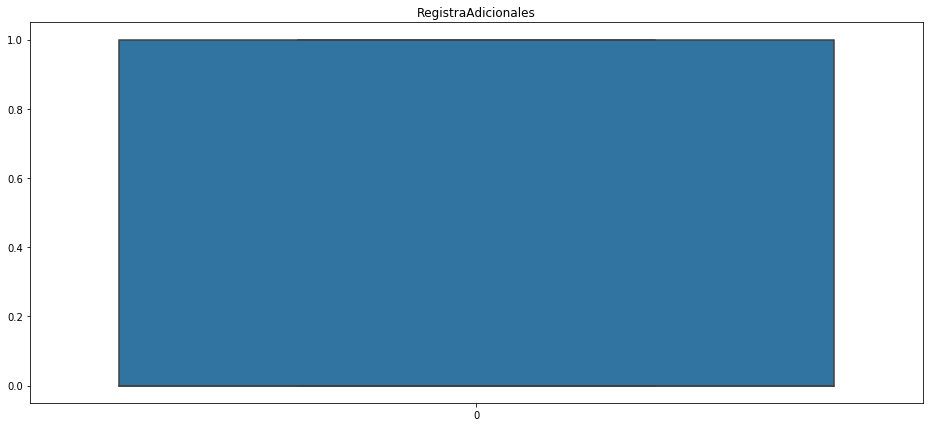

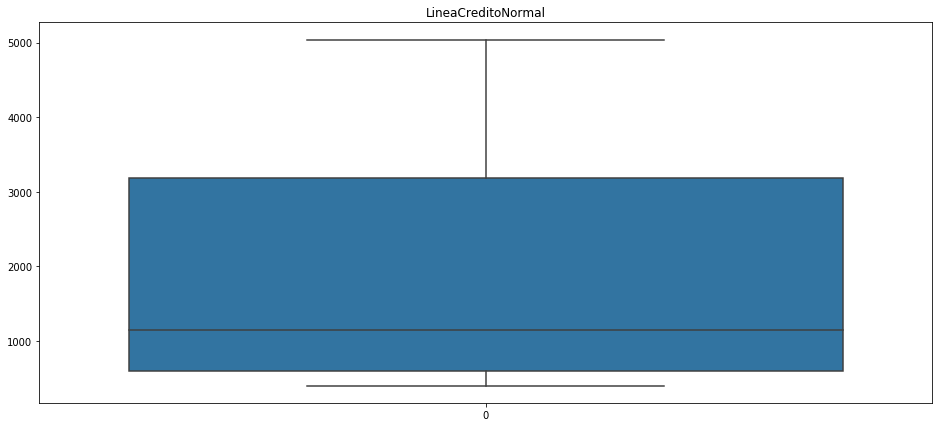

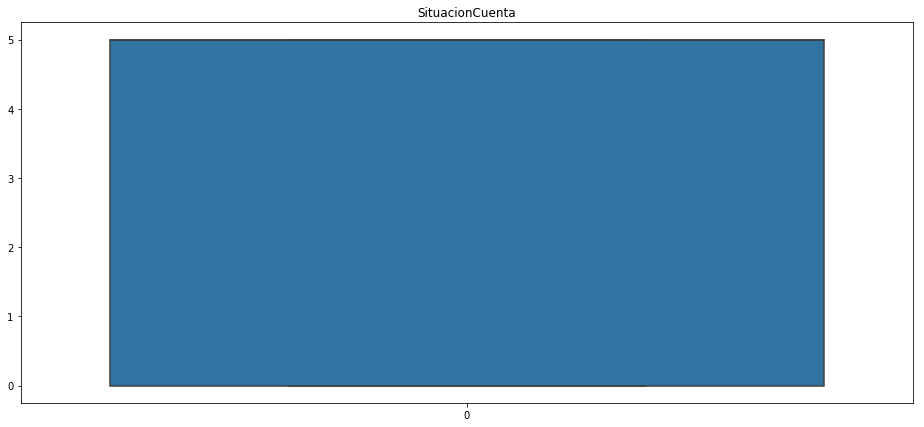

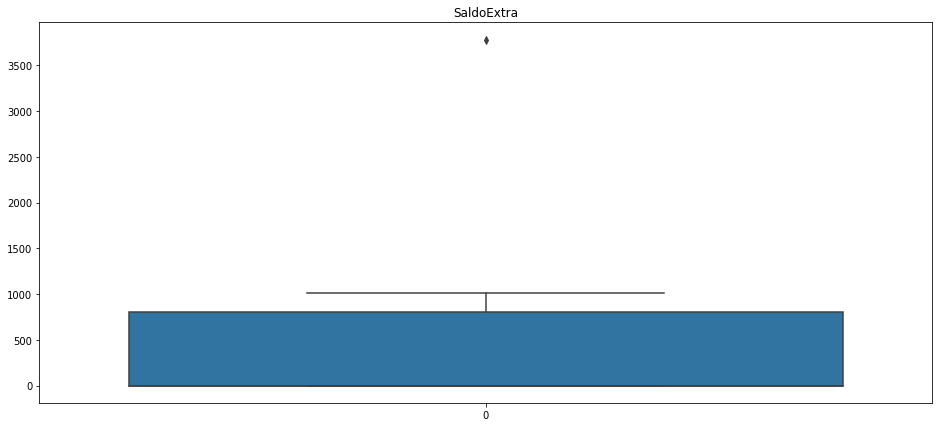

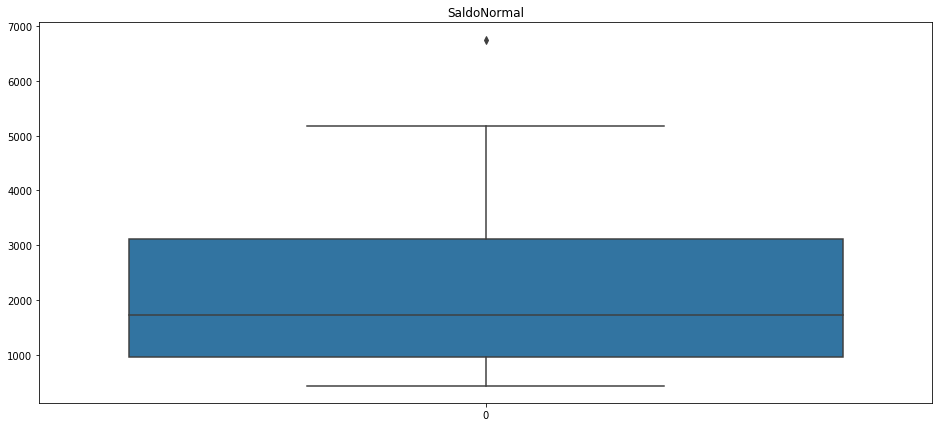

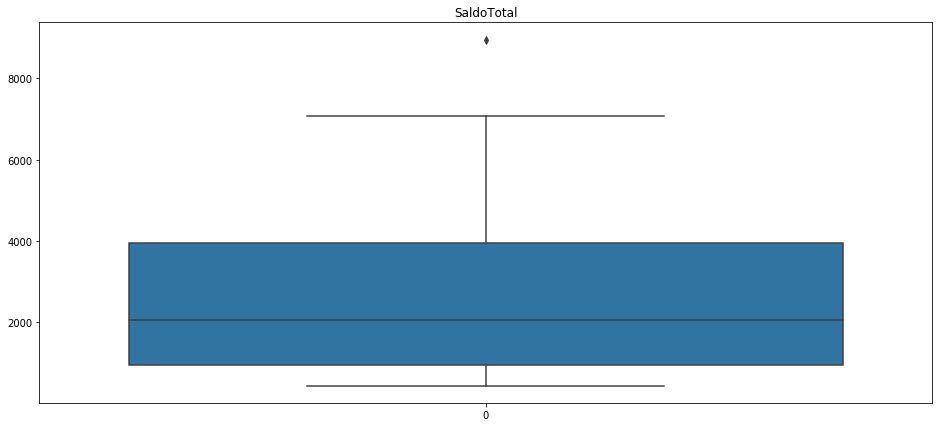

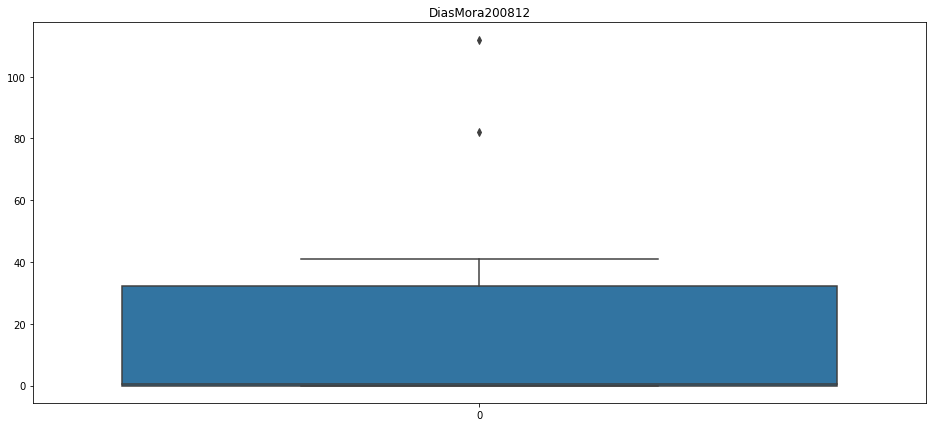

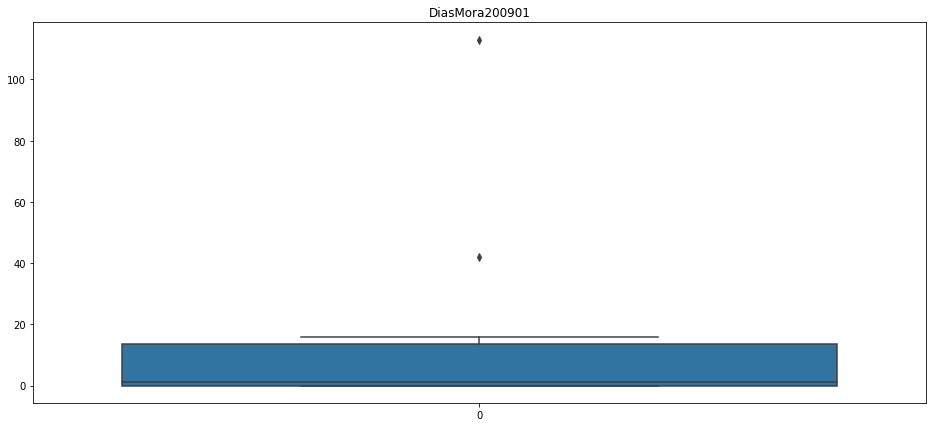

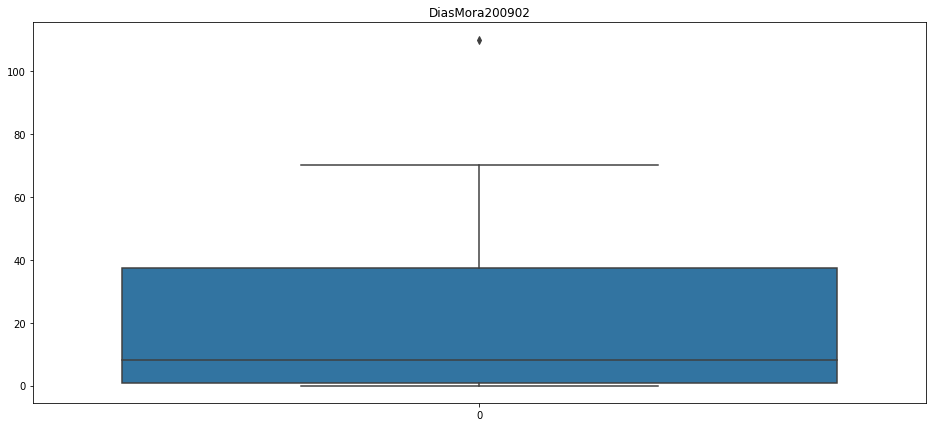

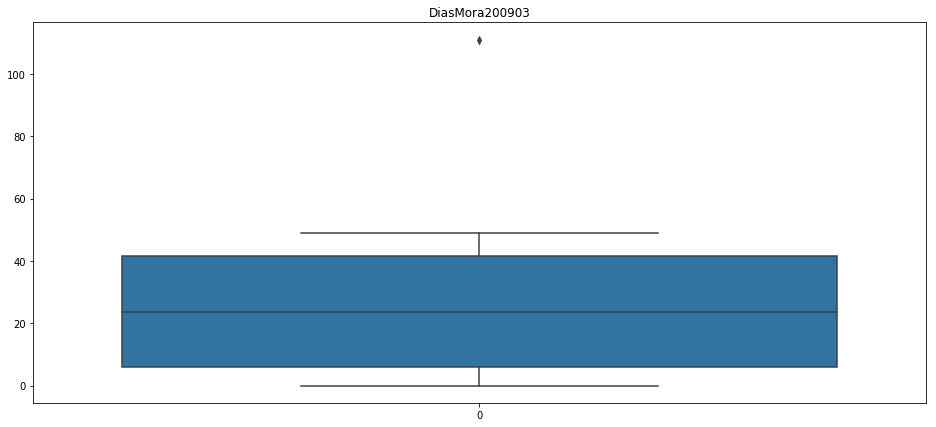

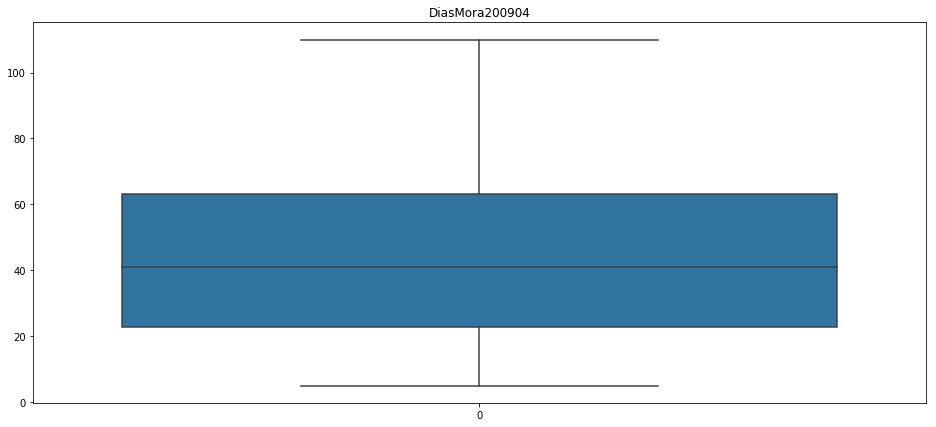

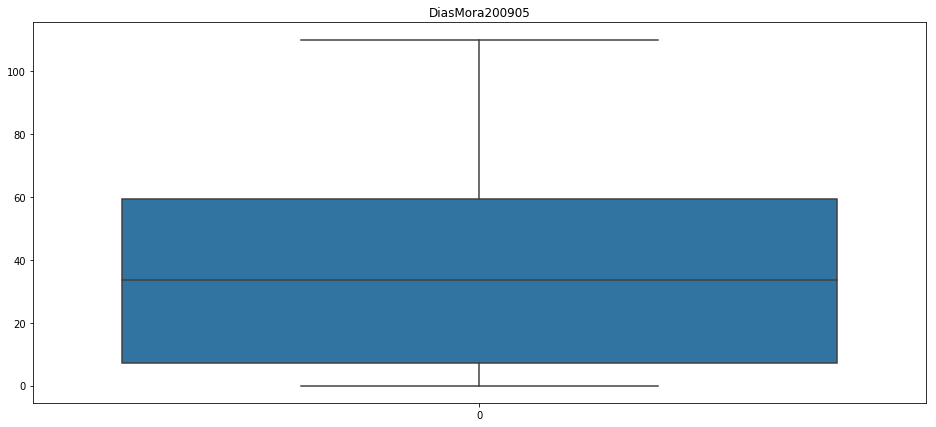

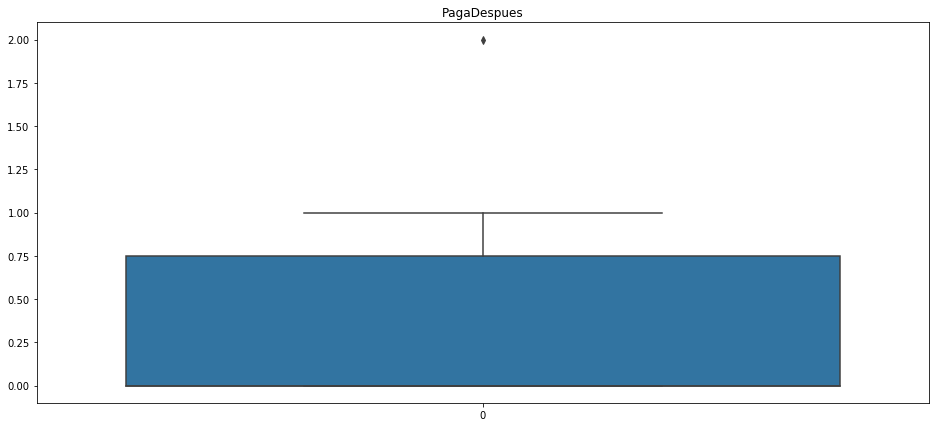

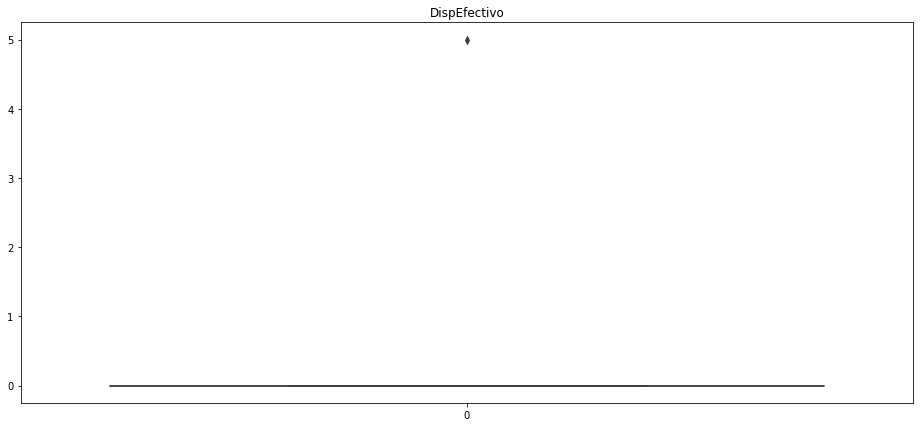

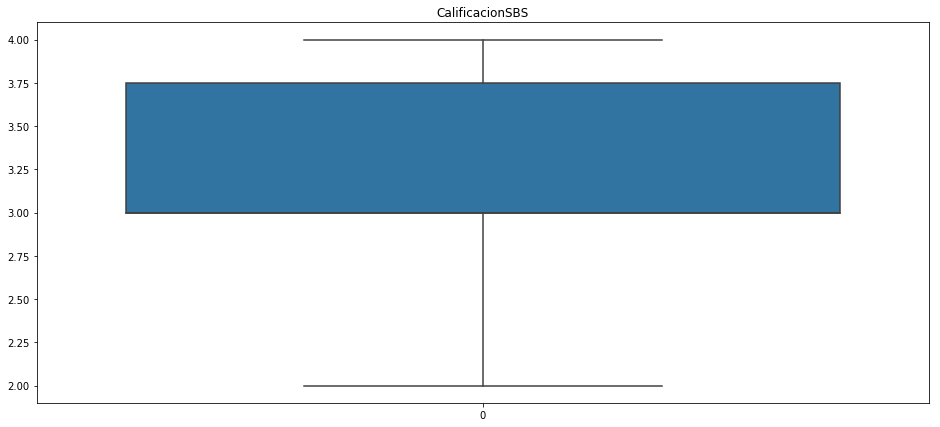

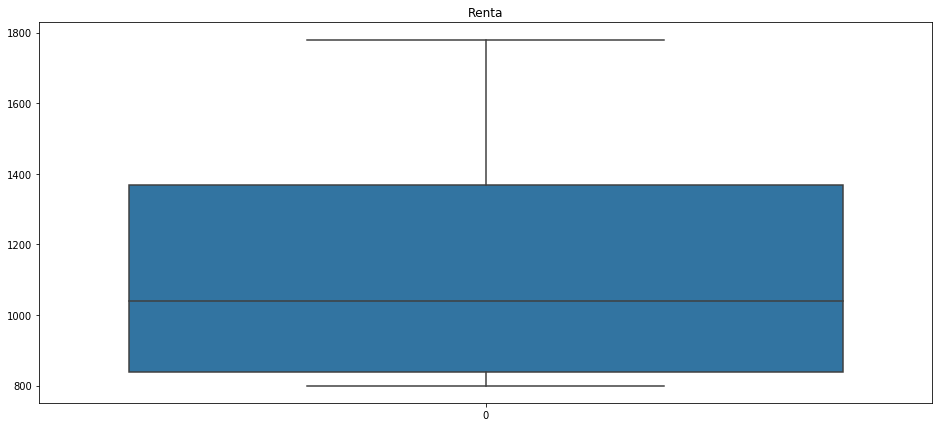

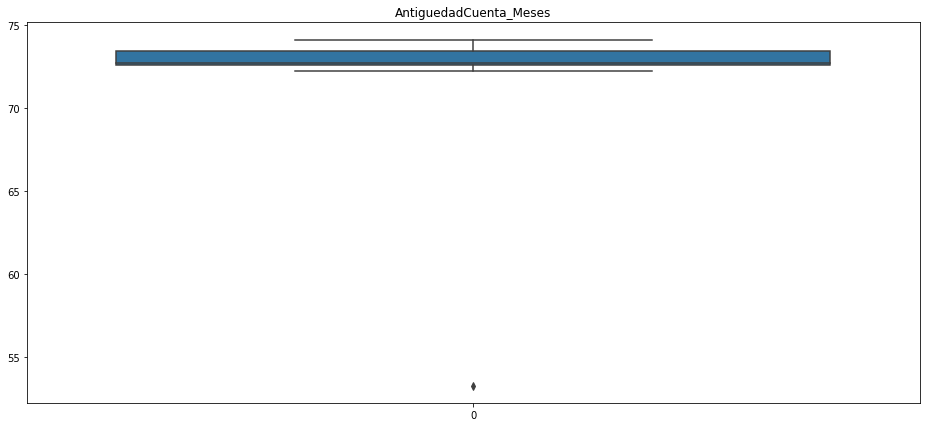

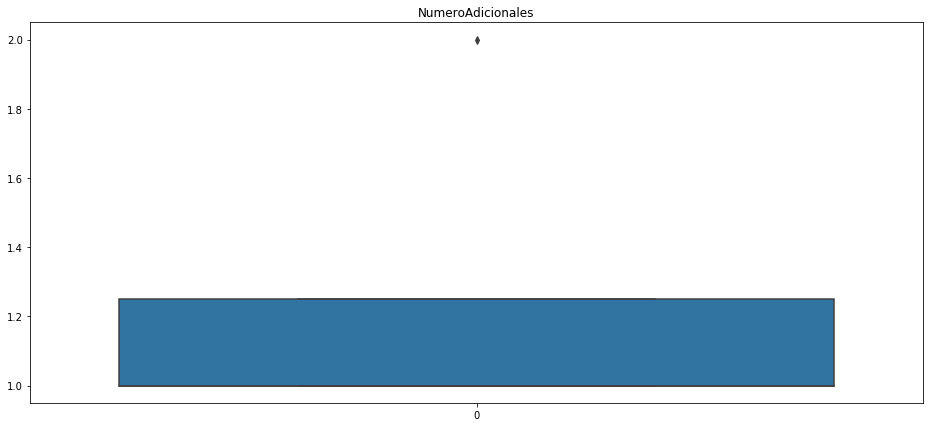

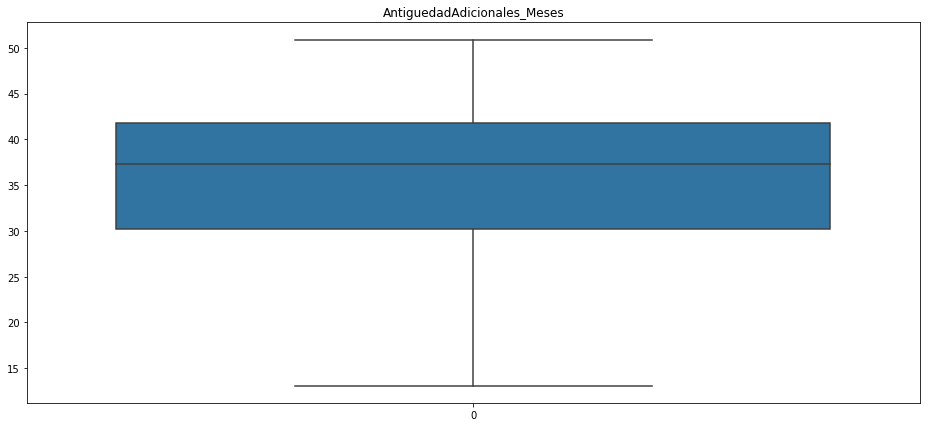

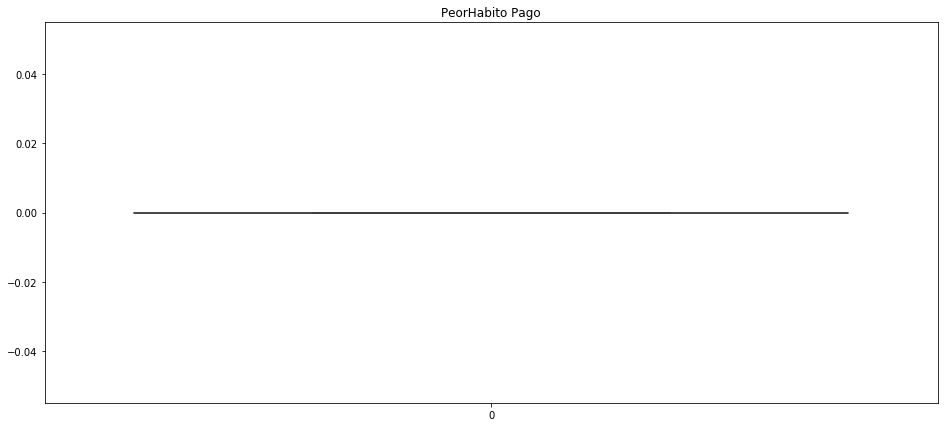

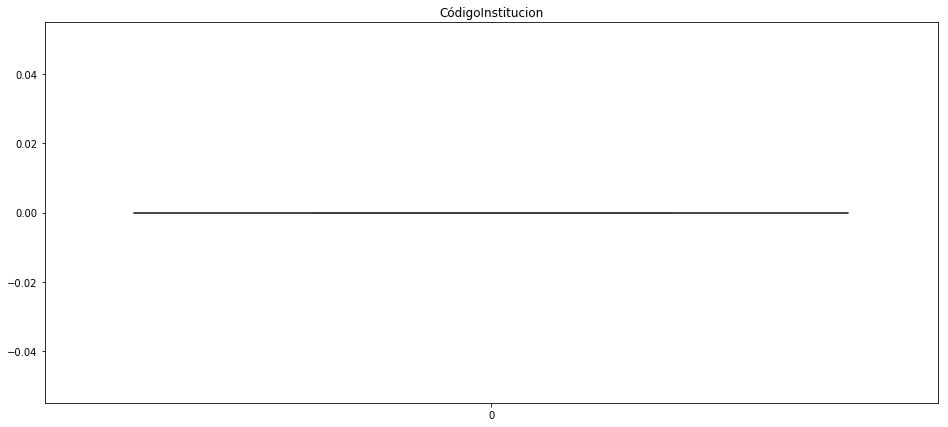

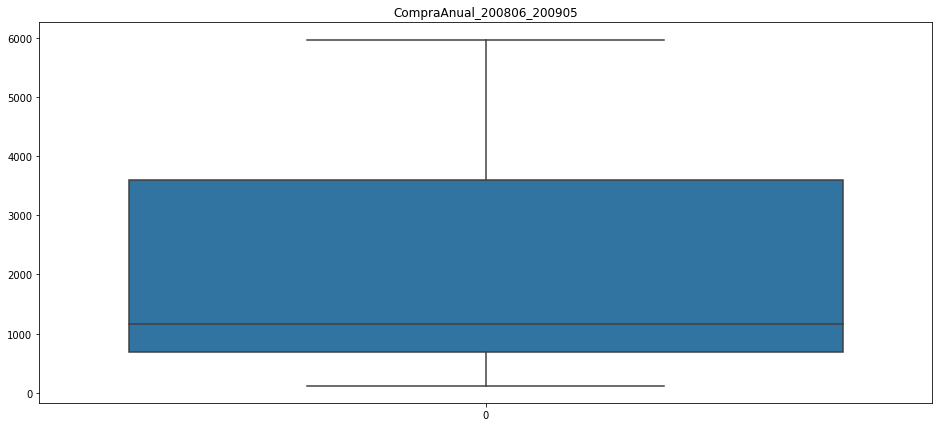

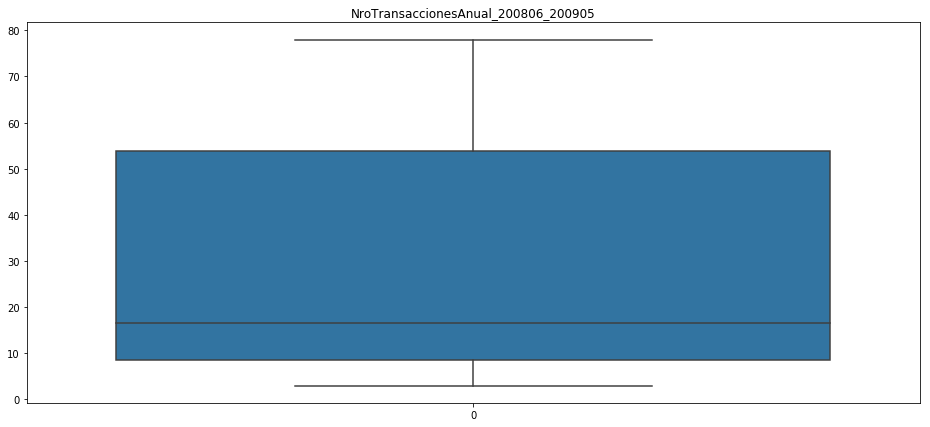

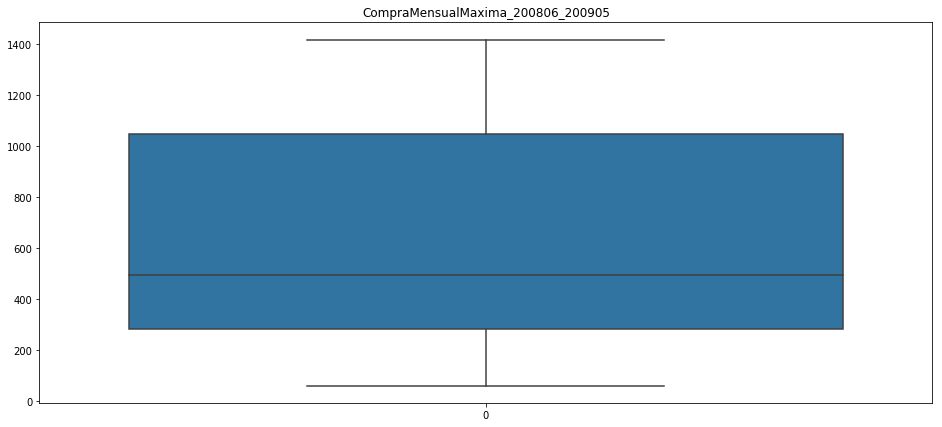

'for cat in feature_columns["numerical"]:\n  #graficos\n    plt.figure(figsize=(15,8)) #def tamaño\n    sns.boxplot(data=Train_Balanceado.loc[:,cat])\n    plt.title(cat)\n    plt.show()\n    import gc\n    gc.collect()'

In [27]:
#comienza a  evaluar las columnas numericas
#diagrama de caja
for cat in feature_columns["numerical"]:
    plt.figure(figsize= (16,7))
    sns.boxplot(data =Train_Balanceado.loc[:,cat] )
    plt.title(cat)
    plt.show()
    import gc
    gc.collect()
    
    


"""for cat in feature_columns["numerical"]:
  #graficos
    plt.figure(figsize=(15,8)) #def tamaño
    sns.boxplot(data=Train_Balanceado.loc[:,cat])
    plt.title(cat)
    plt.show()
    import gc
    gc.collect()"""

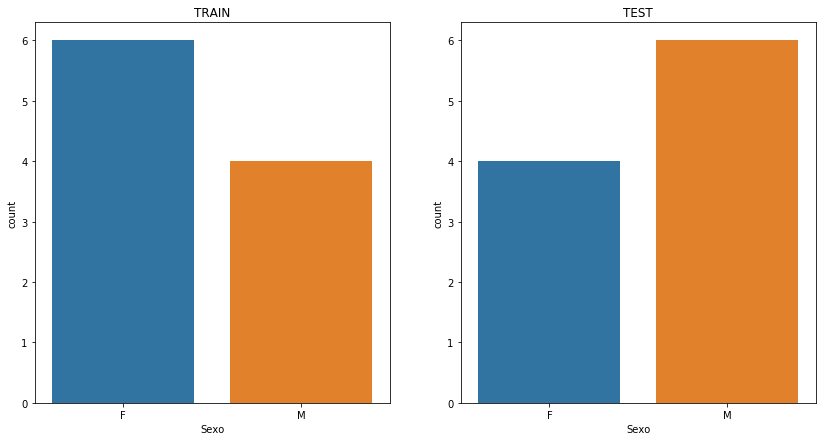

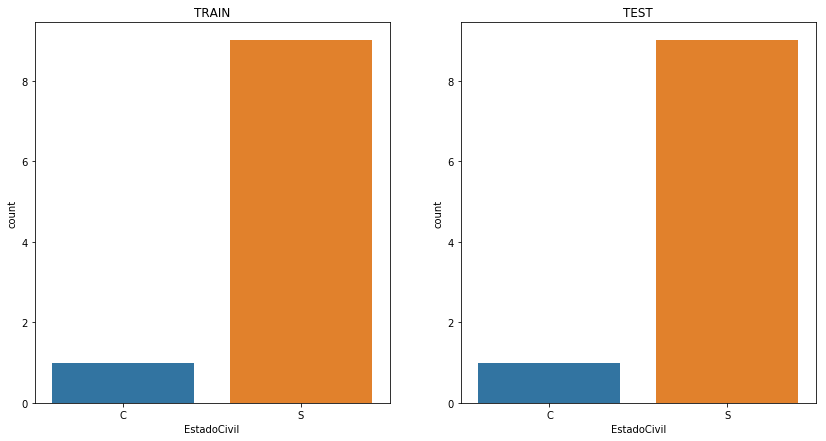

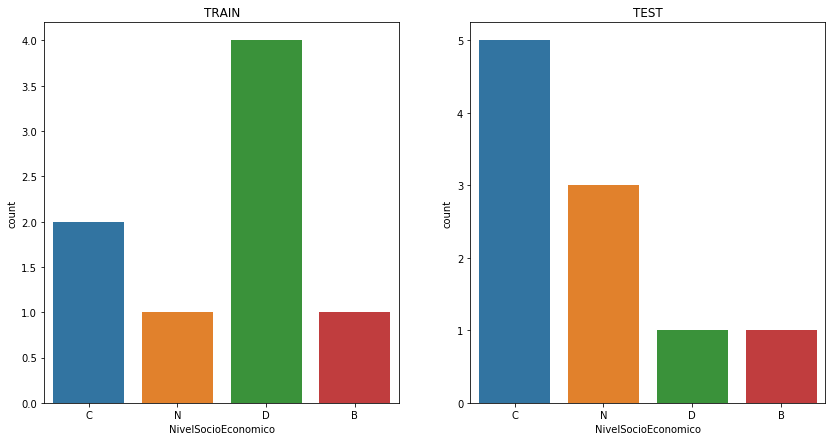

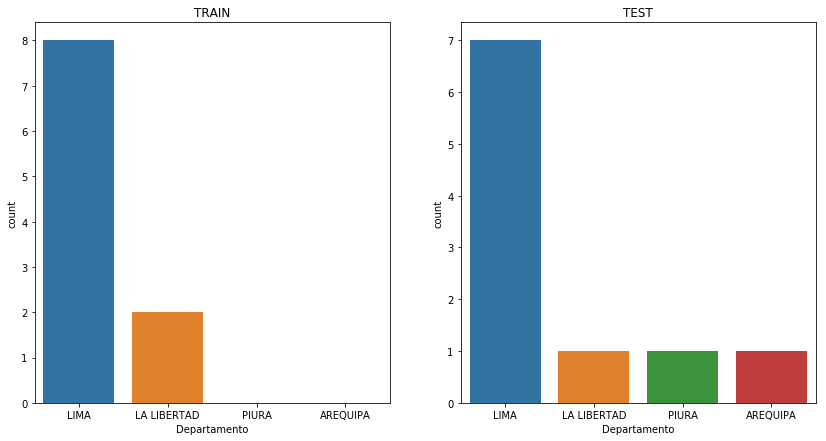

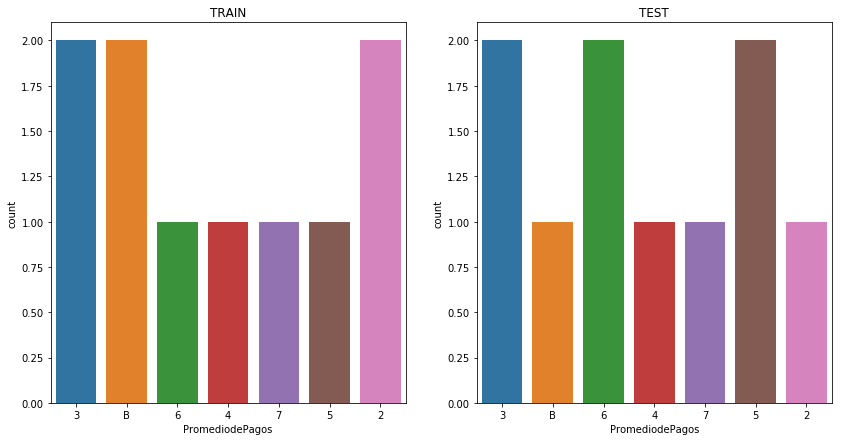

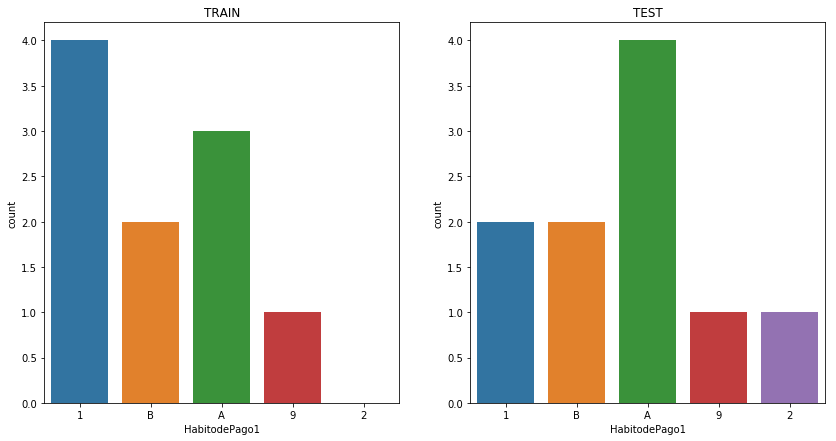

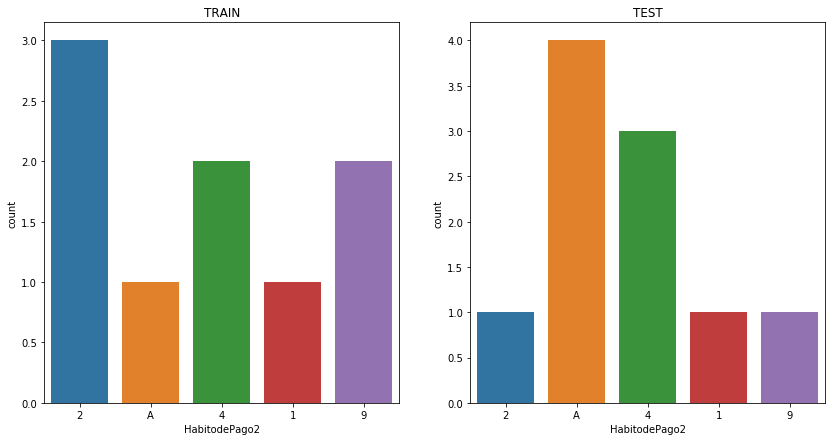

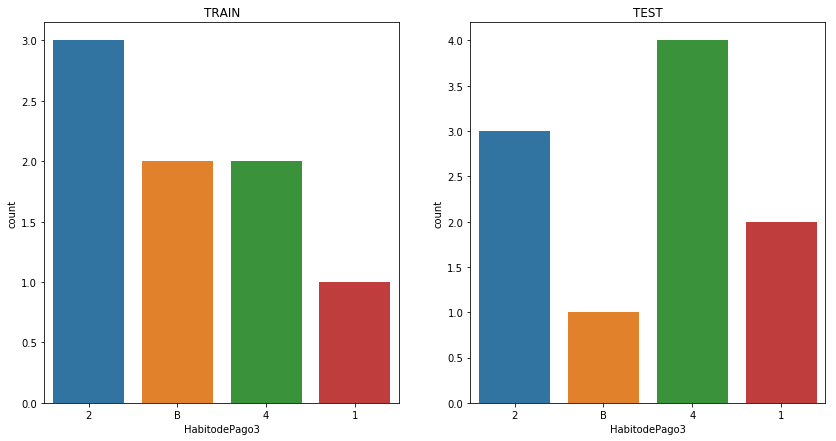

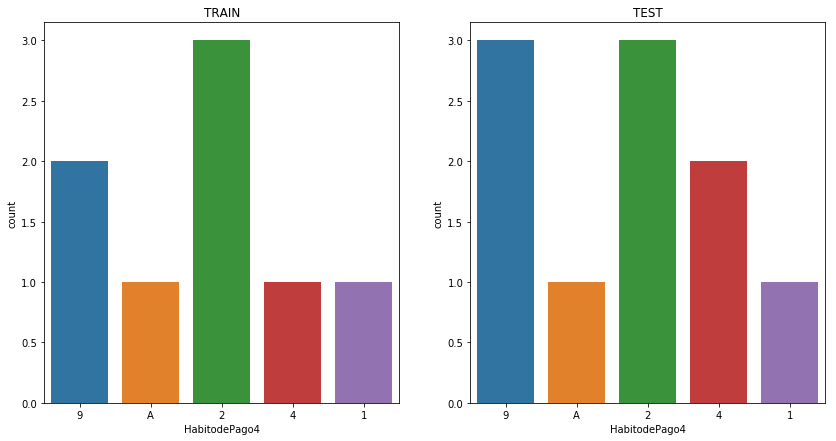

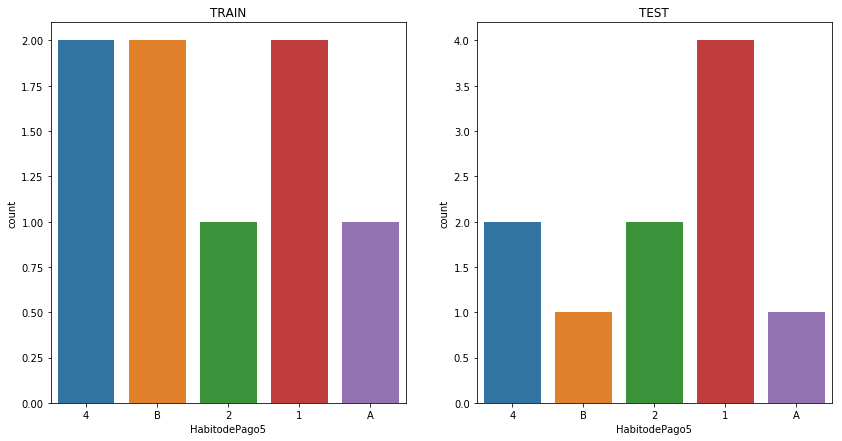

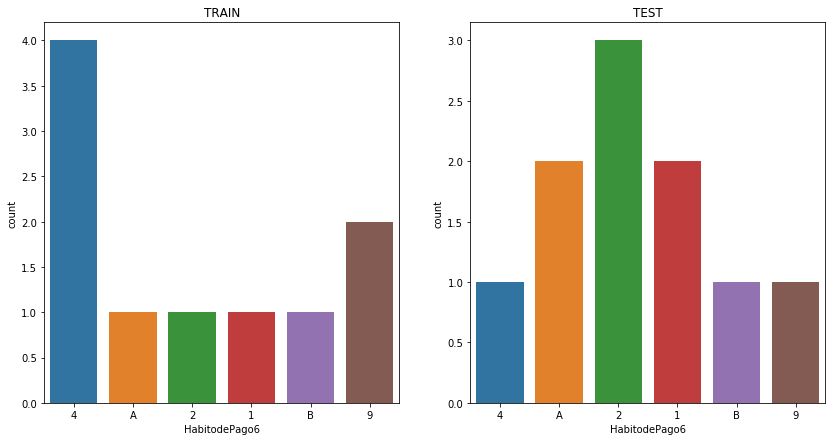

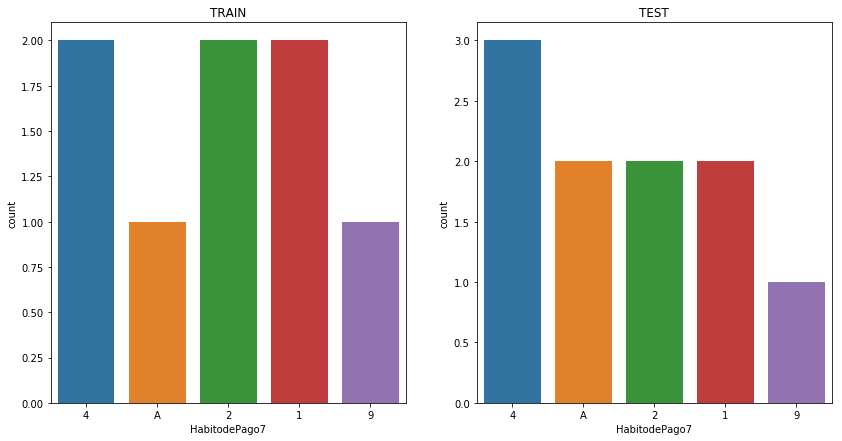

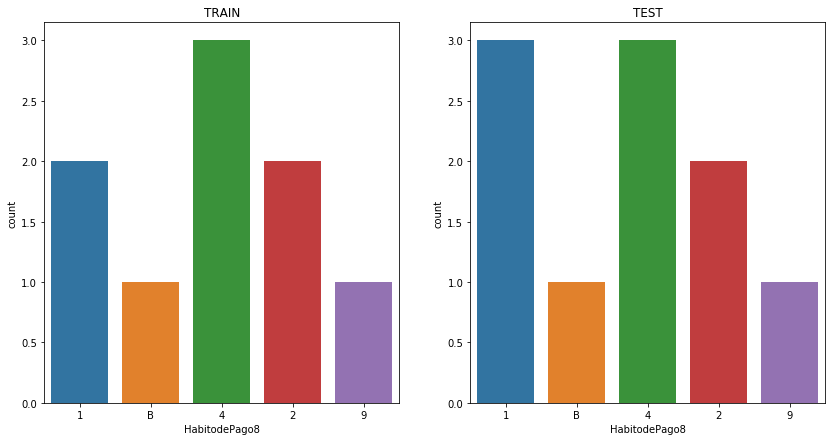

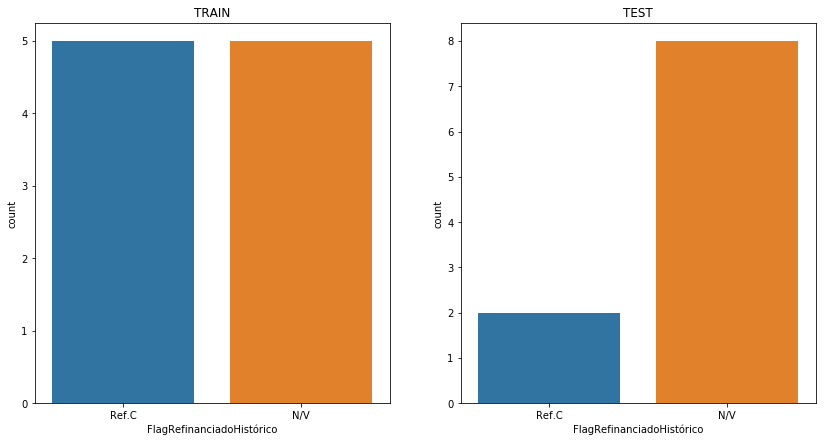

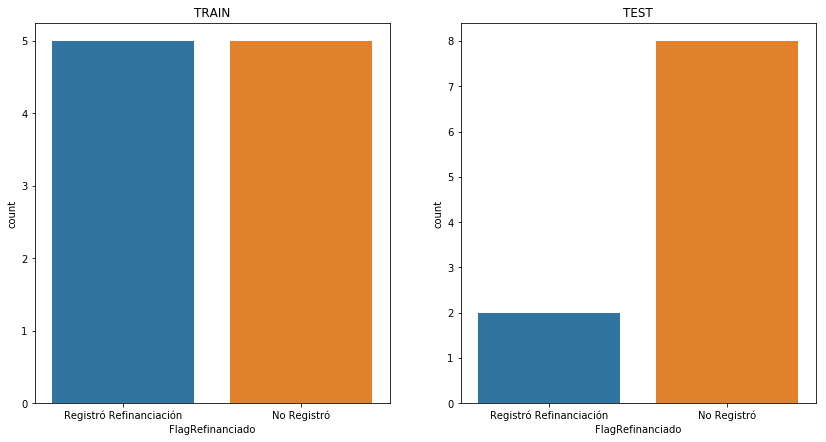

'for cat in feature_columns["categorical"]:\n    #variables categoricas pueden tomar un valor de un grupo limitado, y por lo general fijo\n    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharex=True) #tamaño\n    sns.countplot(x=cat,data=Train_Balanceado,ax=ax1) #seaborn ####cuenta el valor de cada variable en un graf de barras\n    ax1.set_title("TRAIN")\n    sns.countplot(x=cat,data=dataTest,ax=ax2)\n    ax2.set_title("TEST")\n    plt.show()\n    import gc\n    gc.collect() '

In [28]:
for cat in feature_columns["categorical"]:
    f, (a1,a2) = plt.subplots(1,2, figsize=(14,7), sharex = True )
    sns.countplot(x = cat, data = Train_Balanceado, ax = a1)
    a1.set_title("TRAIN")
    sns.countplot(x = cat, data = dataTest, ax = a2)
    a2.set_title("TEST")
    plt.show()

"""for cat in feature_columns["categorical"]:
    #variables categoricas pueden tomar un valor de un grupo limitado, y por lo general fijo
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7), sharex=True) #tamaño
    sns.countplot(x=cat,data=Train_Balanceado,ax=ax1) #seaborn ####cuenta el valor de cada variable en un graf de barras
    ax1.set_title("TRAIN")
    sns.countplot(x=cat,data=dataTest,ax=ax2)
    ax2.set_title("TEST")
    plt.show()
    import gc
    gc.collect() """
#########################stop

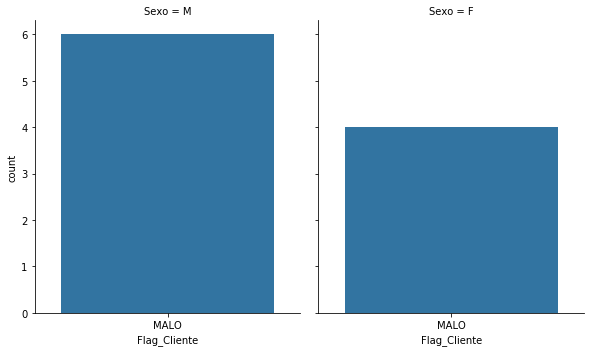

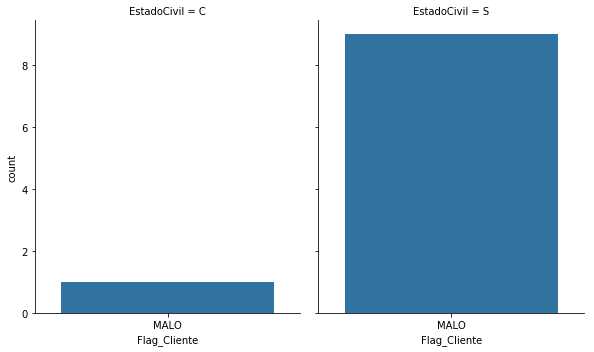

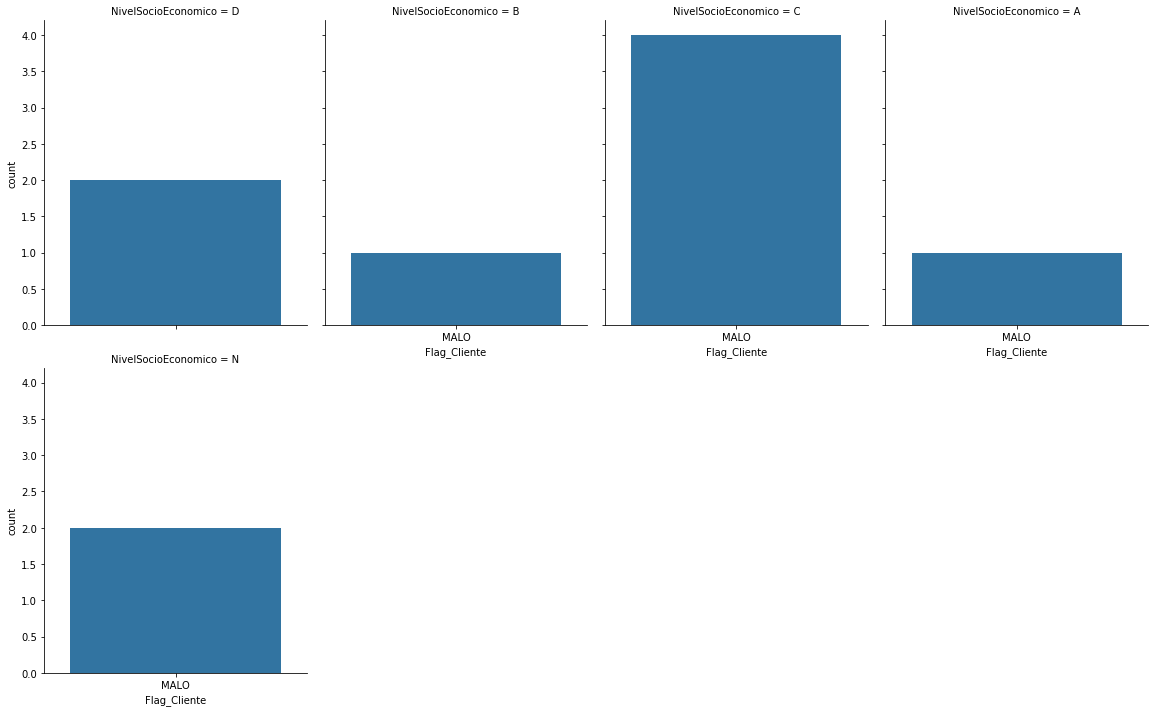

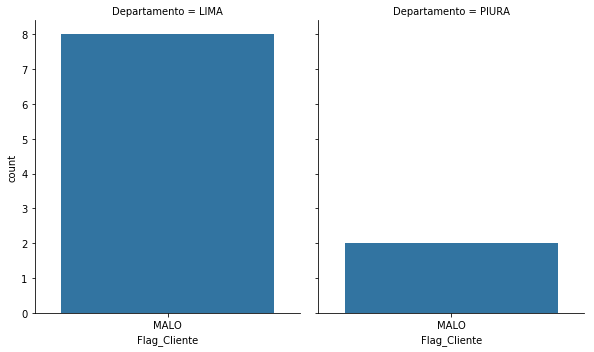

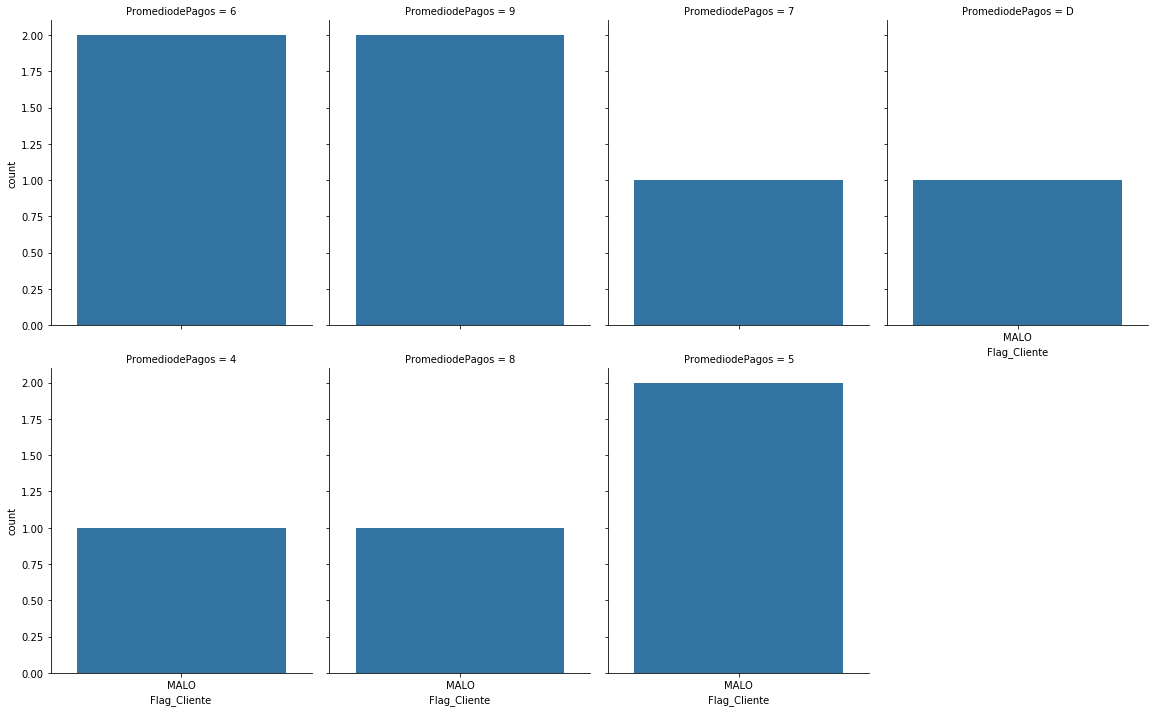

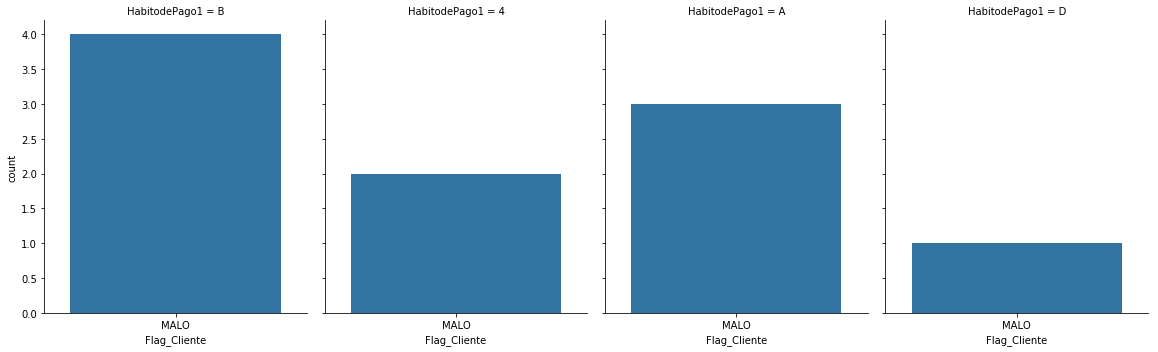

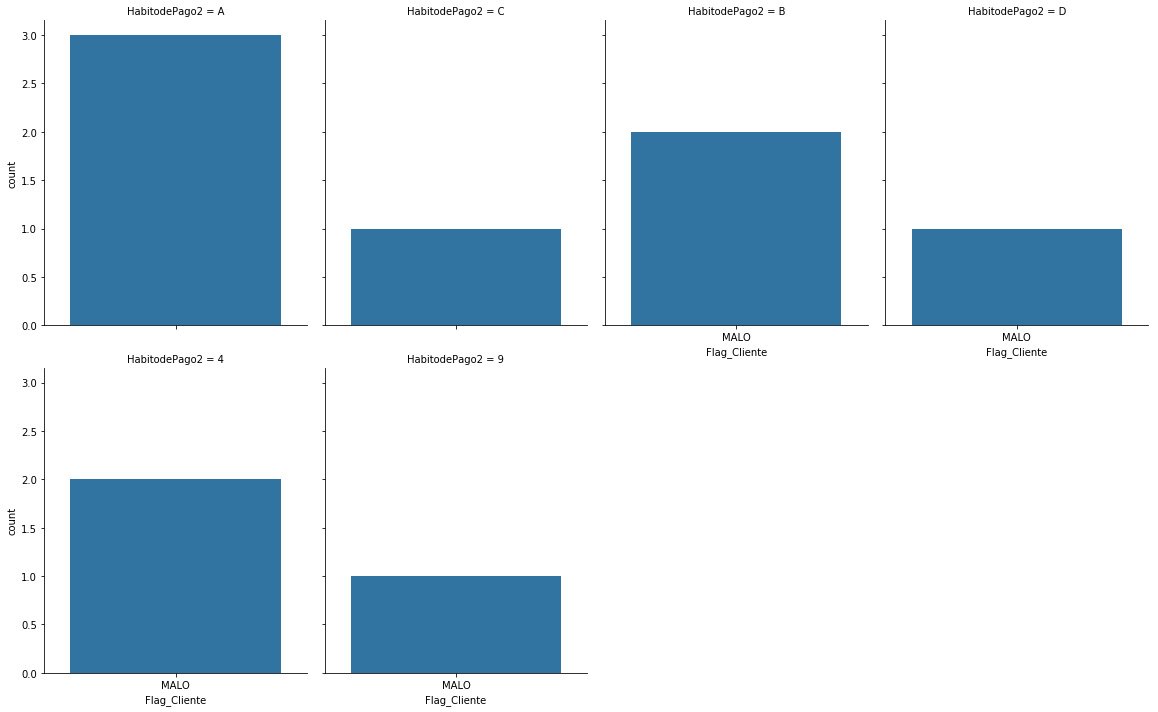

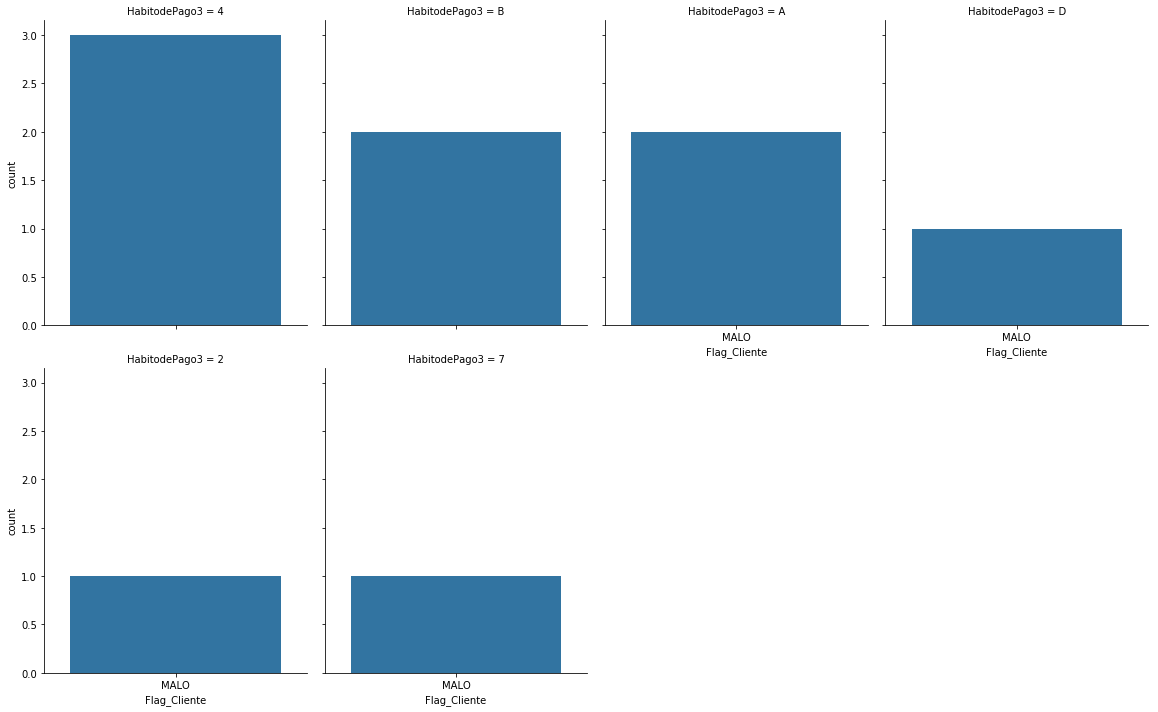

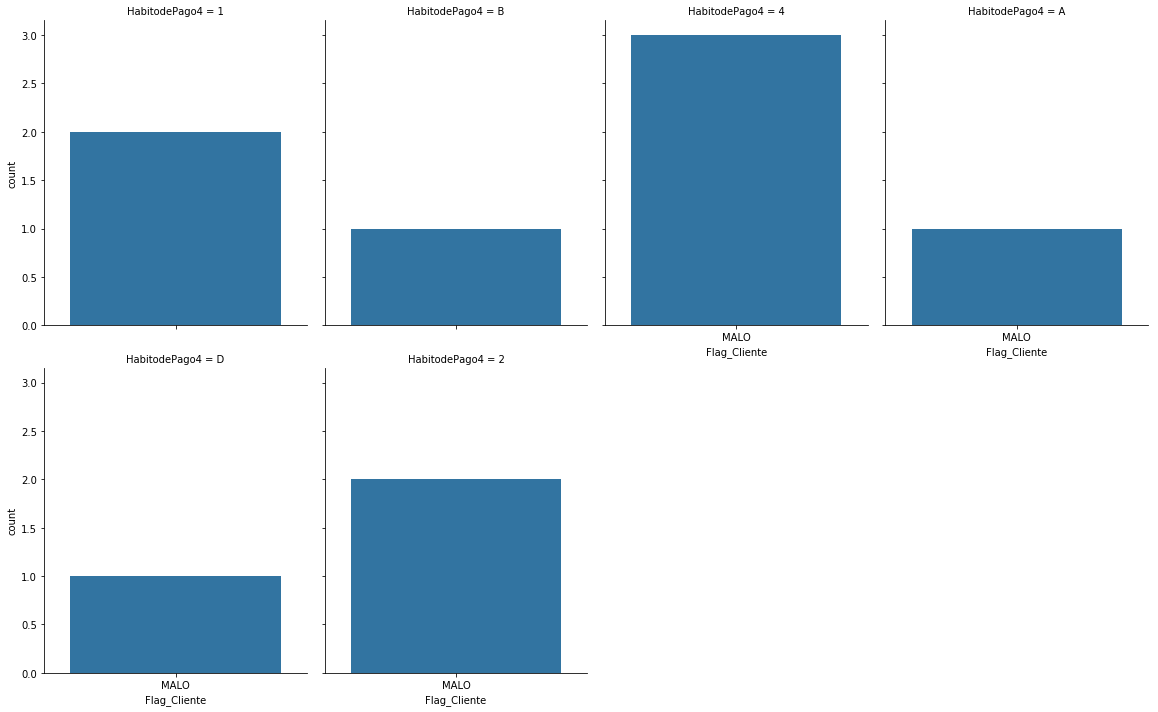

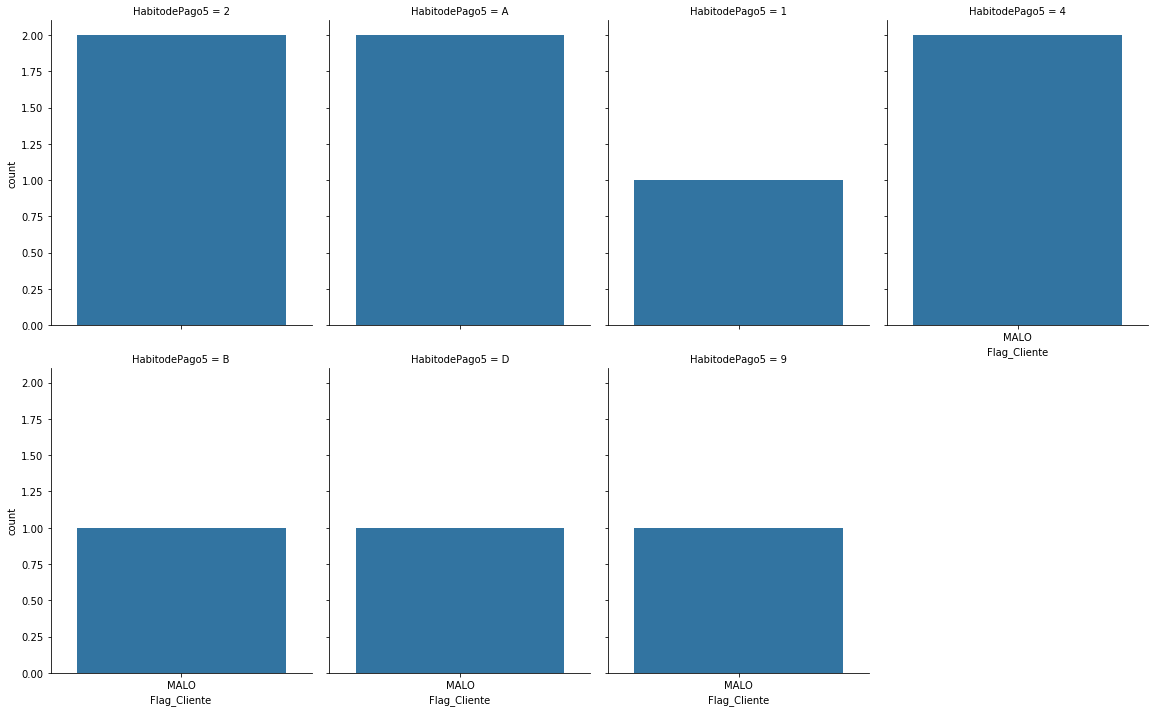

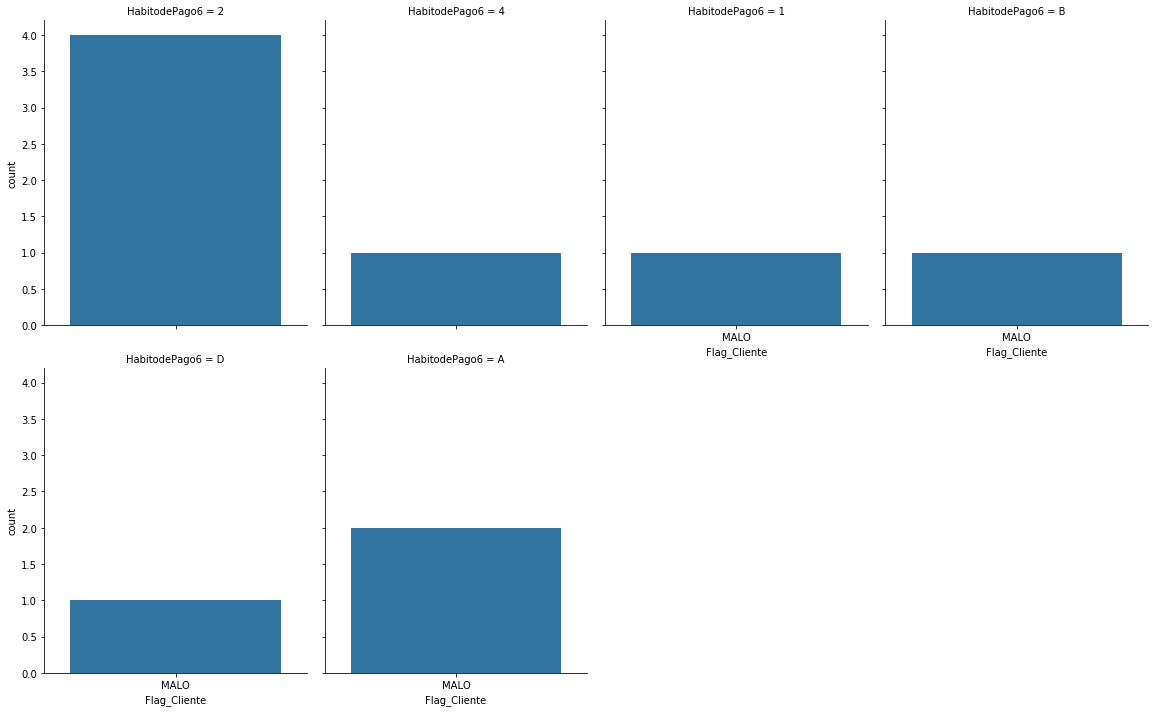

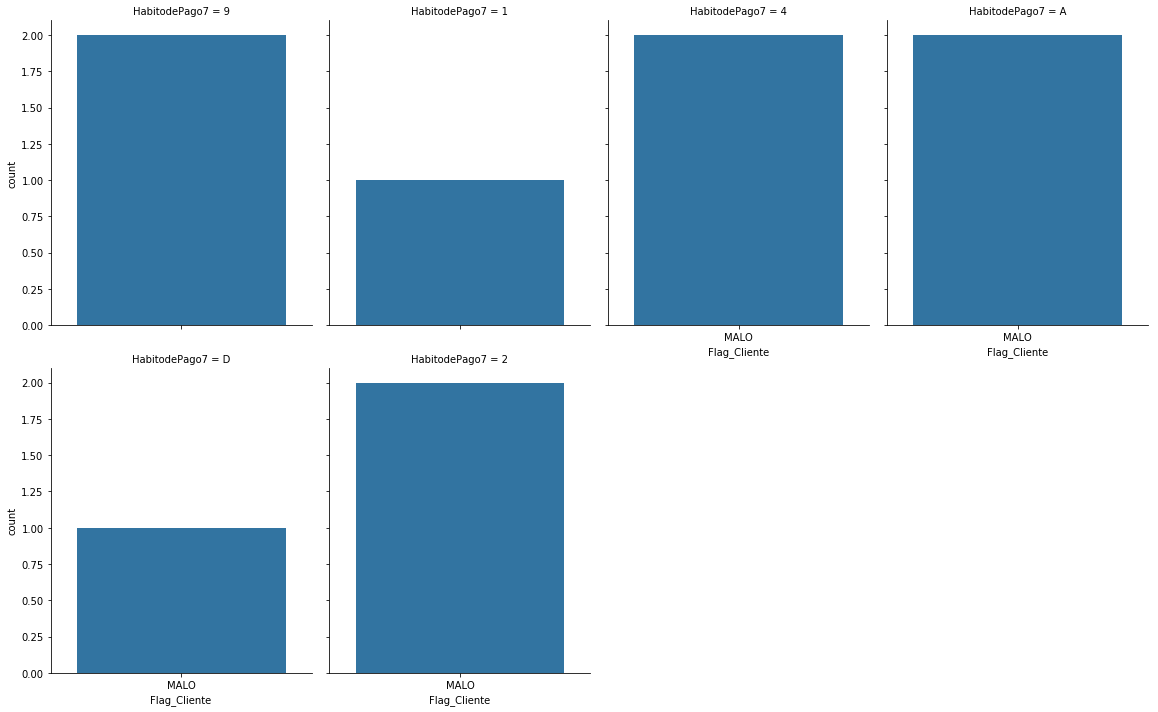

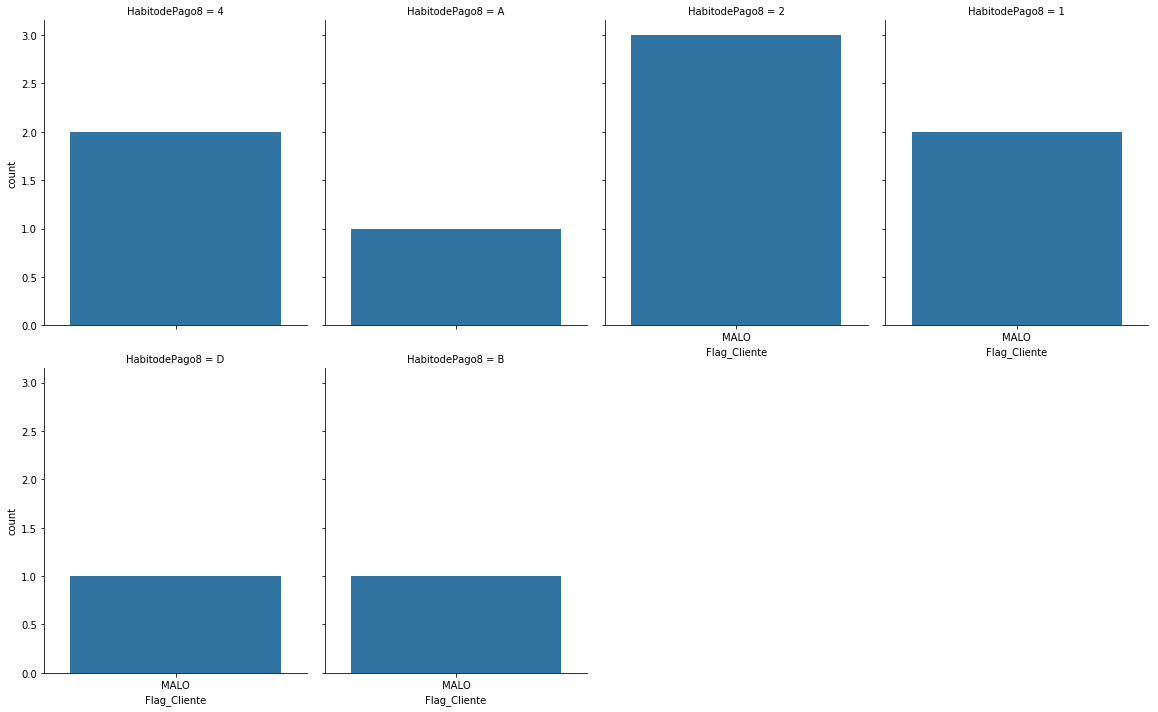

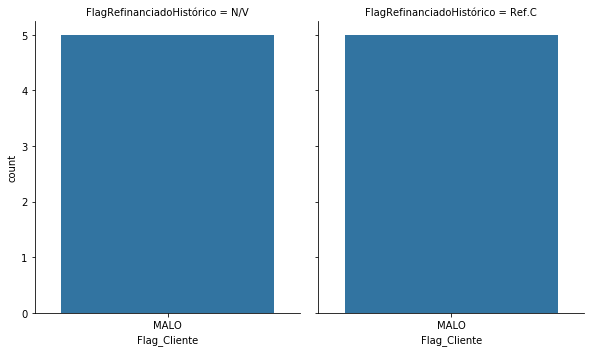

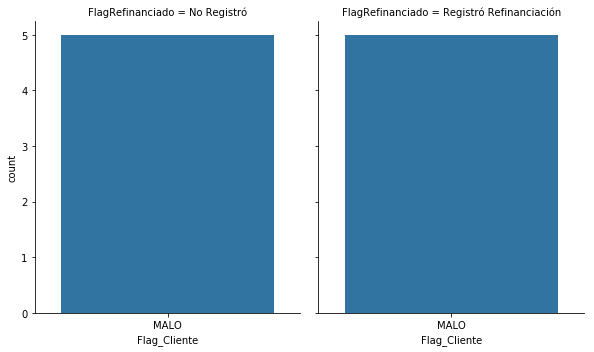

In [29]:
for cat in feature_columns["categorical"]:
  #plt.figure(figsize=(15,8))
    g = sns.catplot("Flag_Cliente", col=cat, col_wrap=4,data=Train_Balanceado,kind="count", height=5, aspect=.8) ###
    plt.show()
    import gc
    gc.collect()

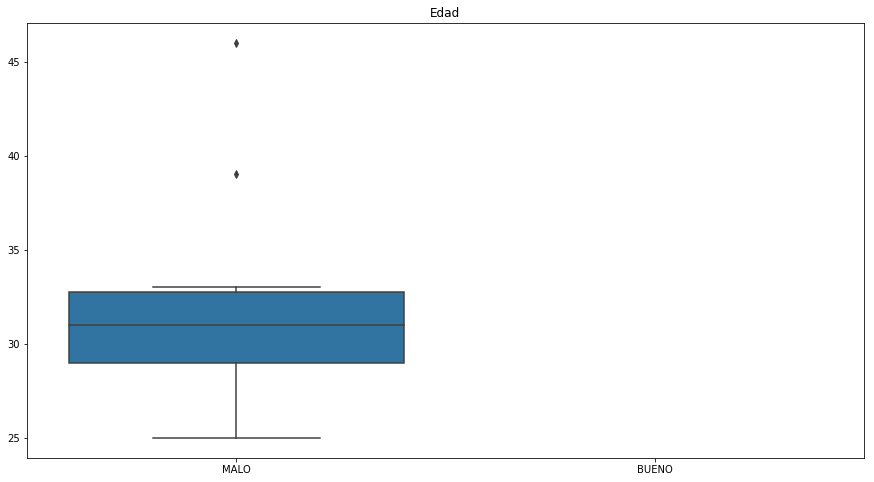

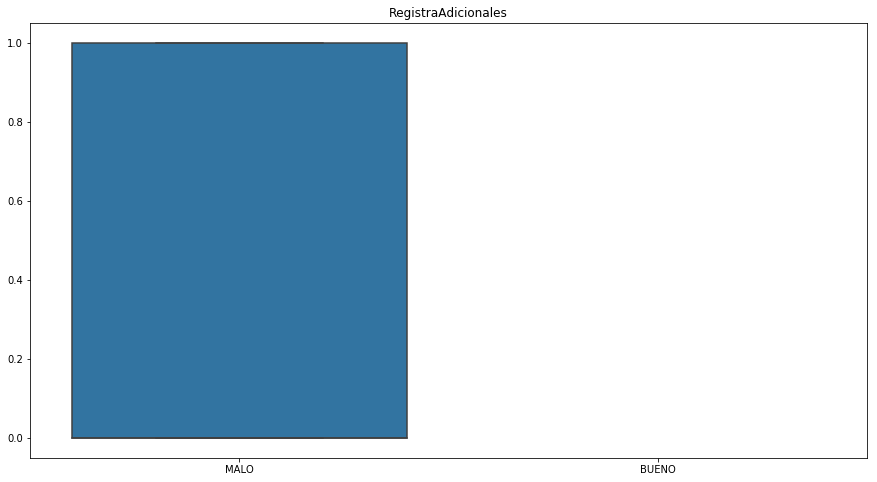

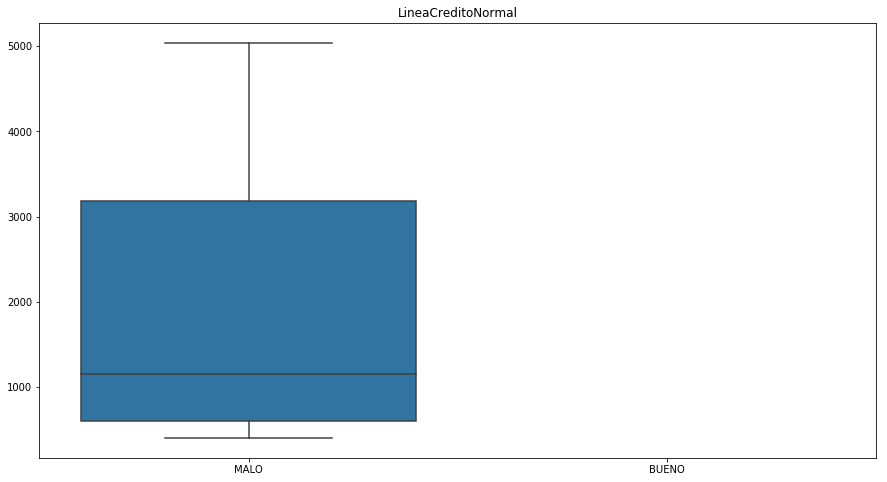

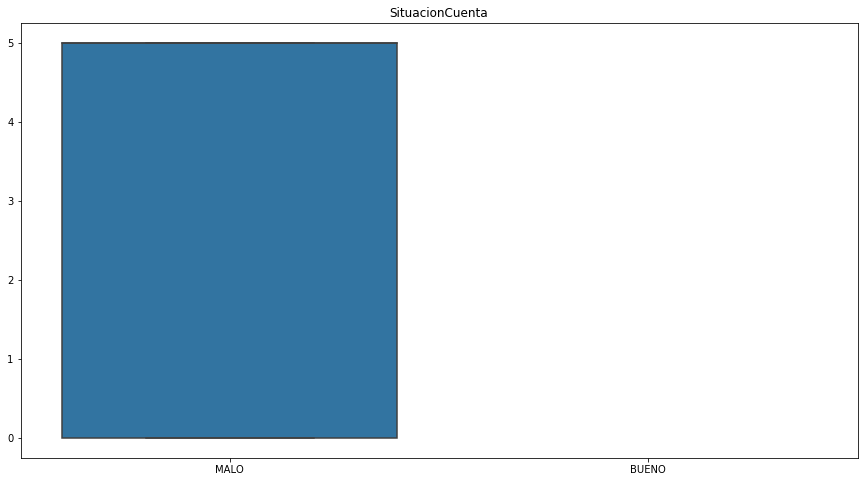

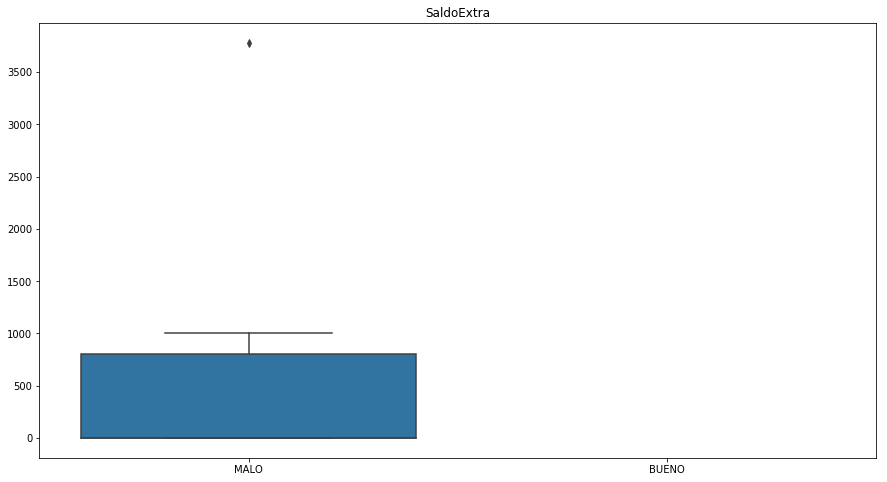

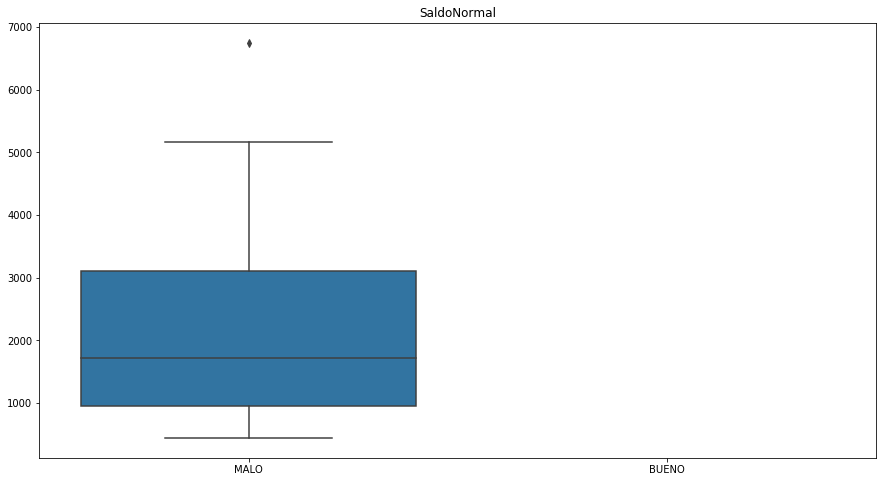

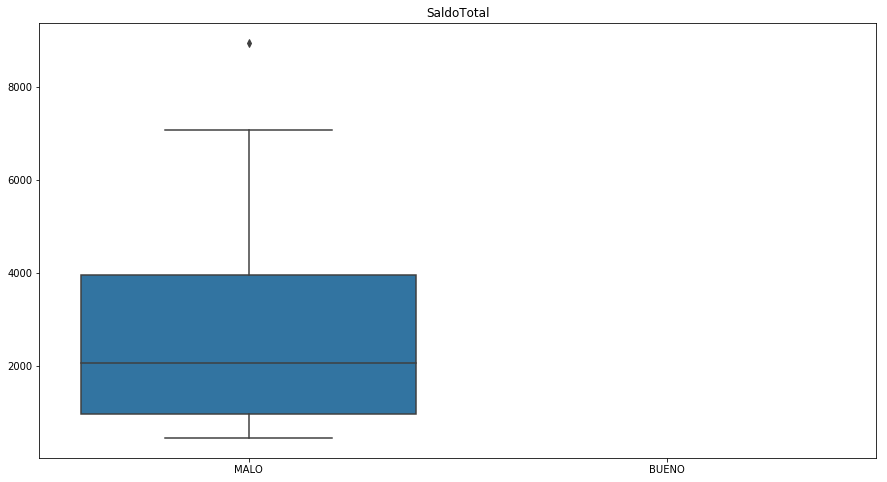

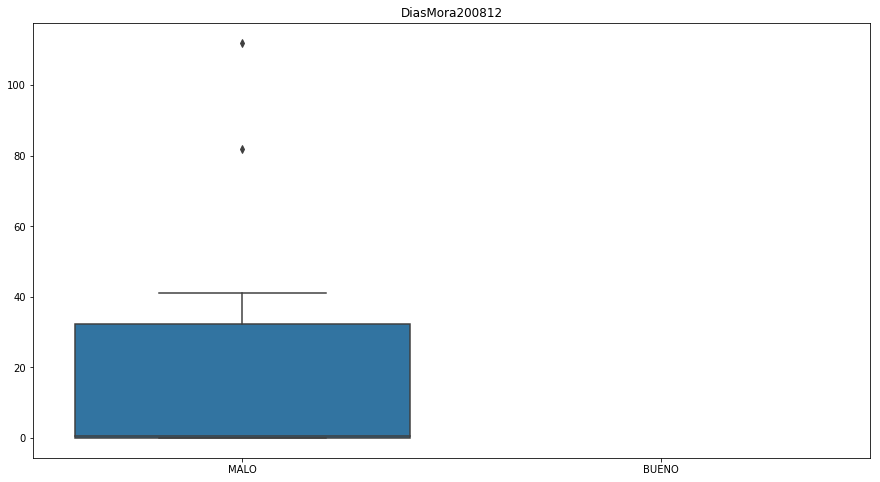

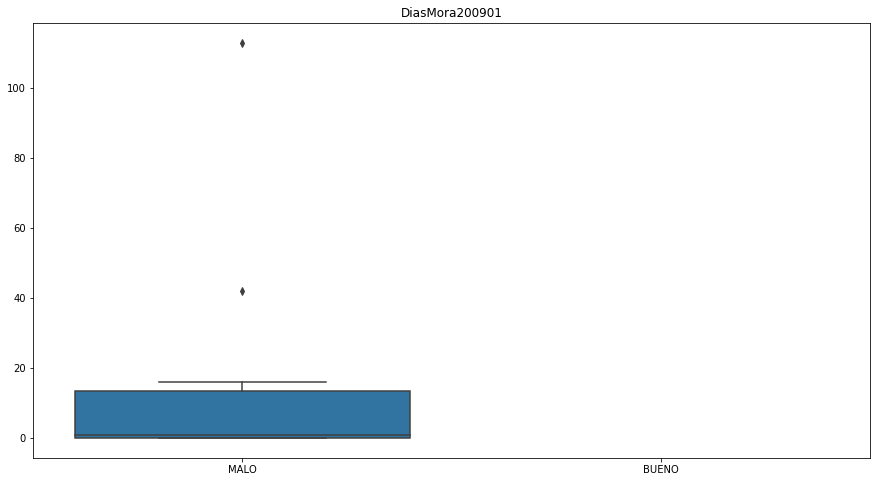

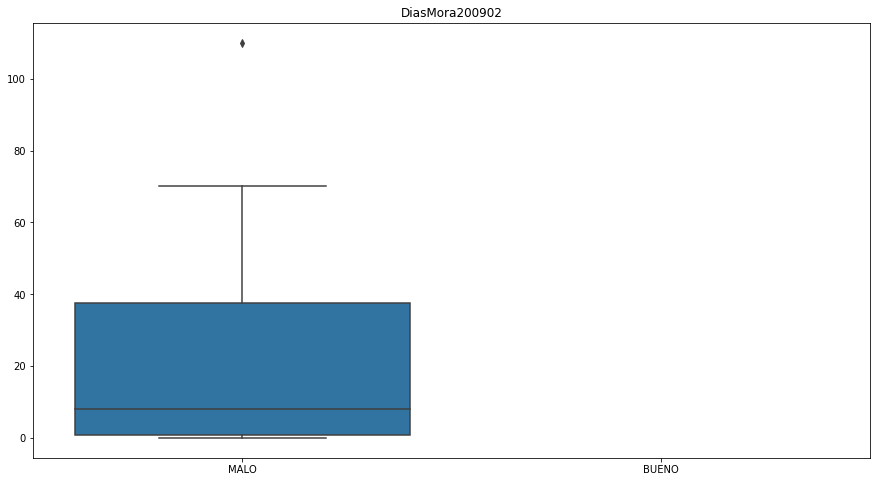

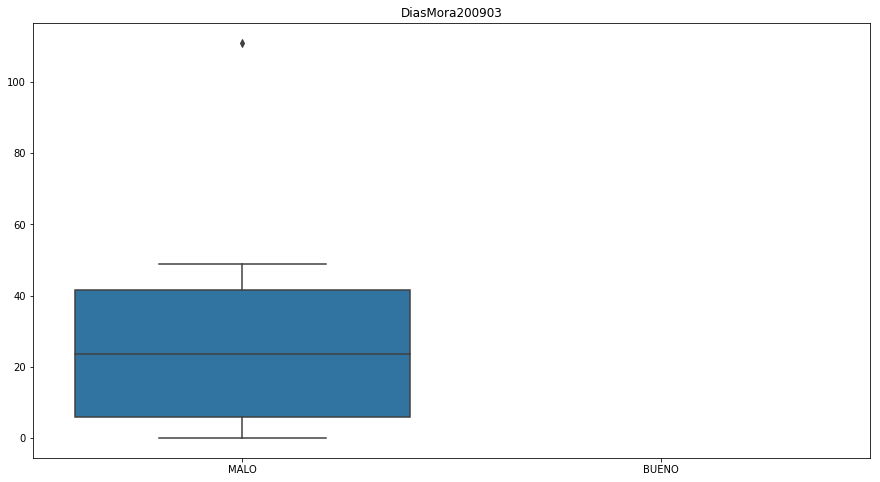

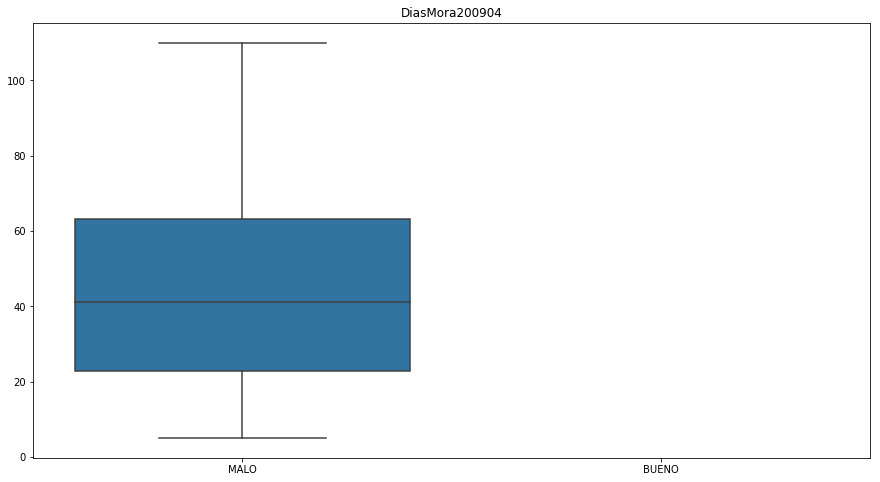

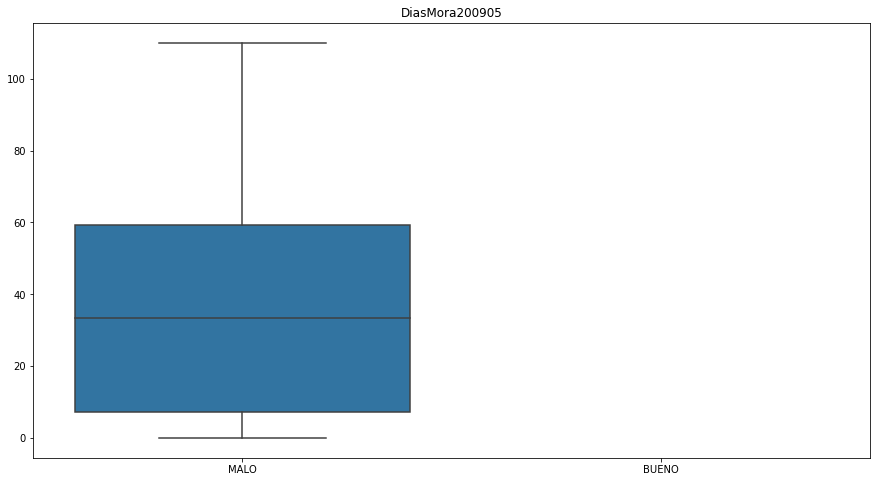

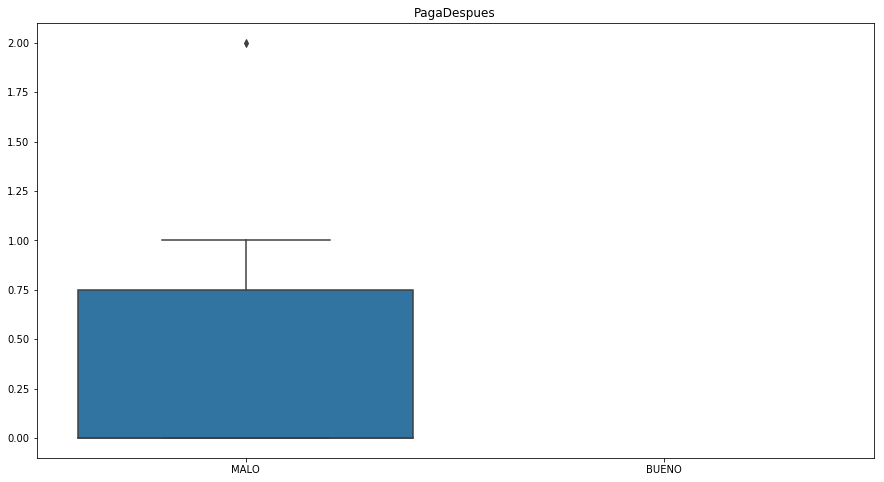

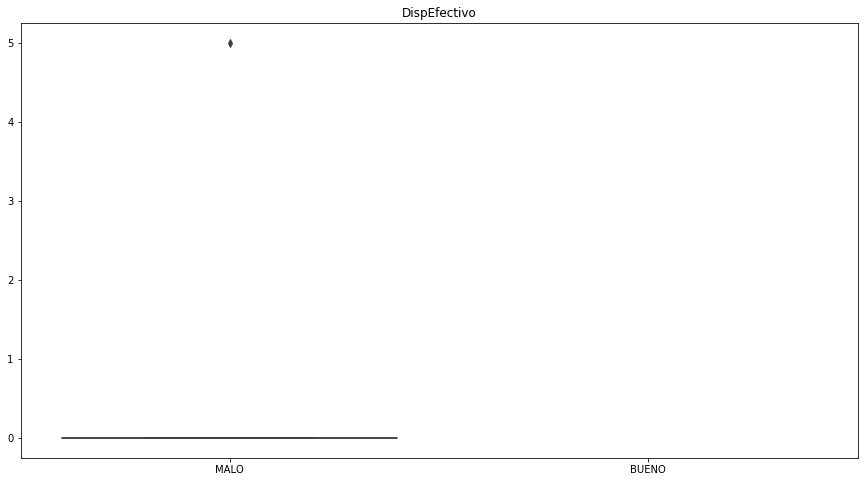

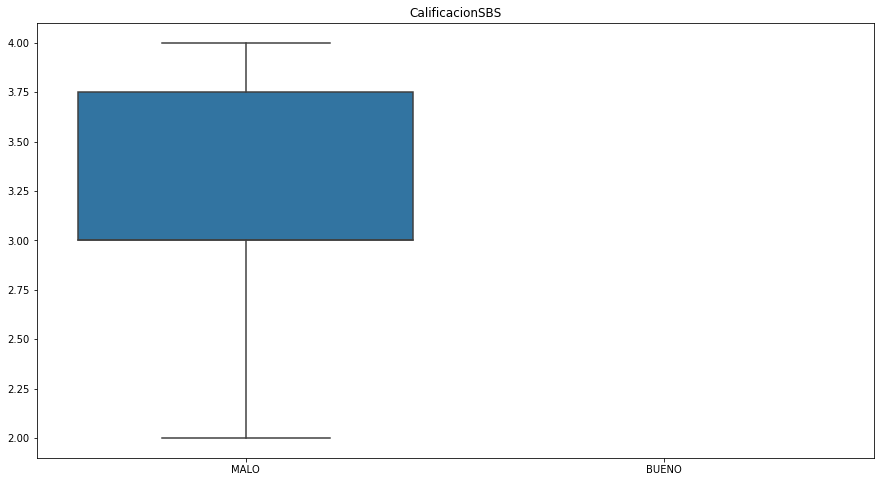

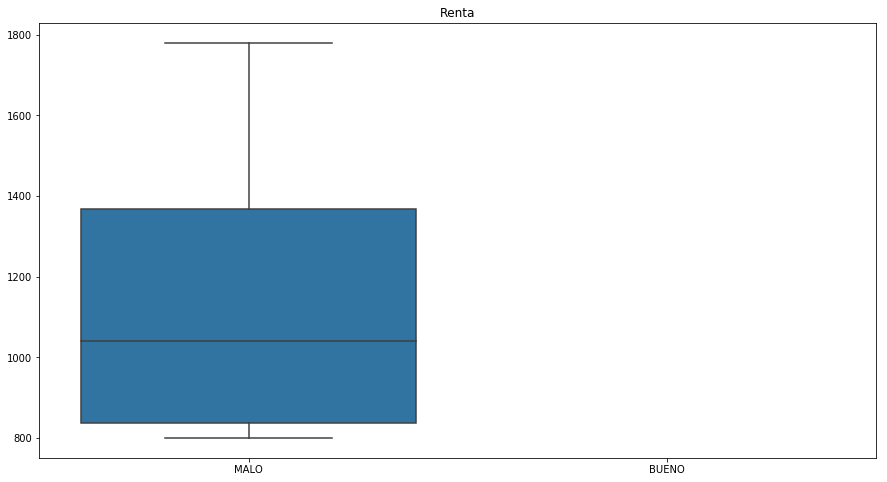

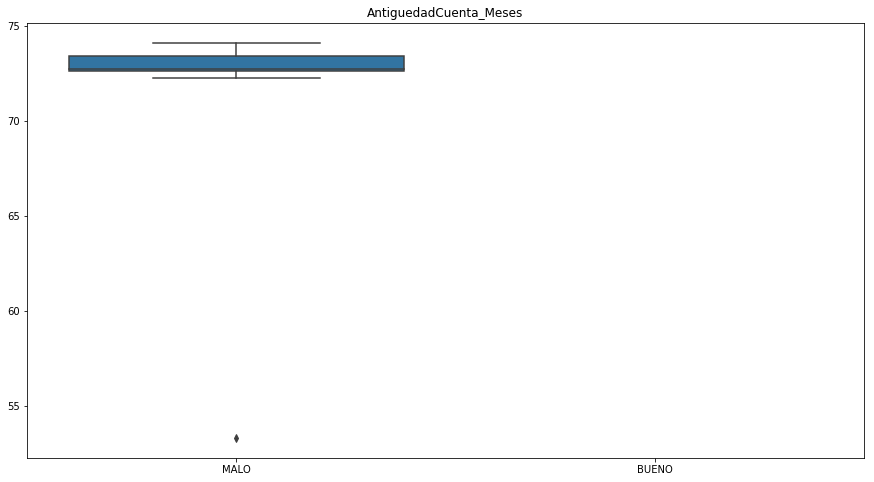

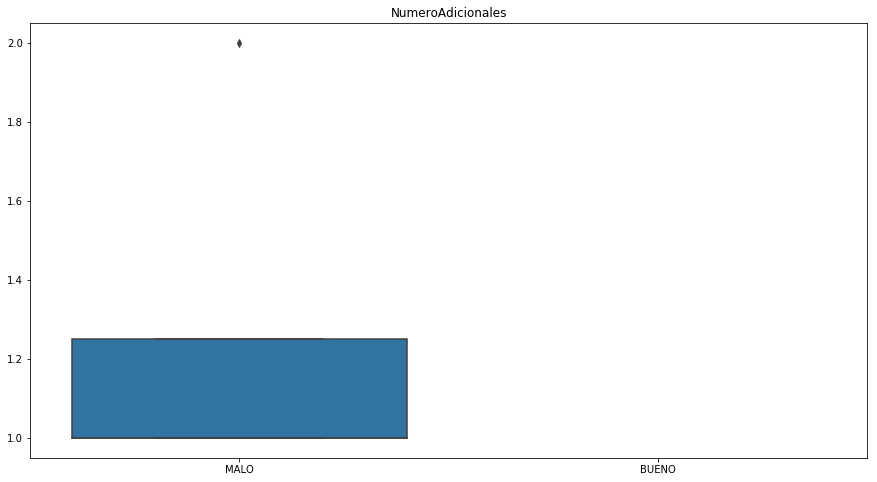

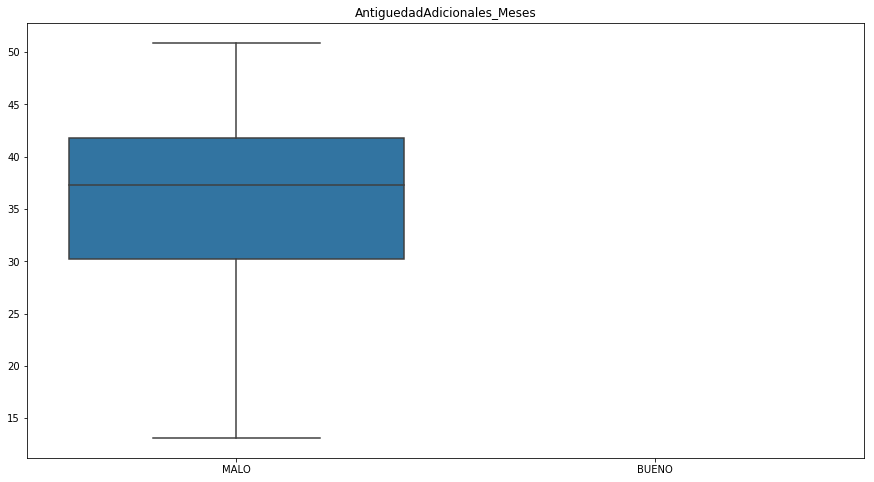

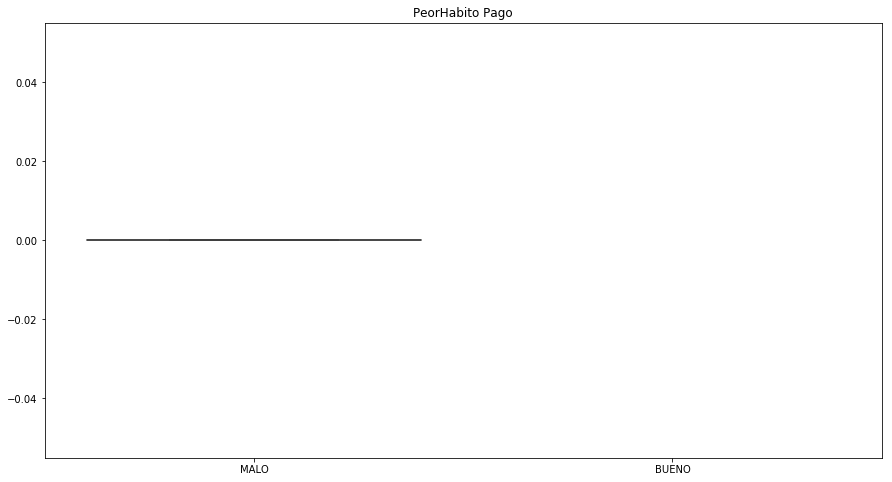

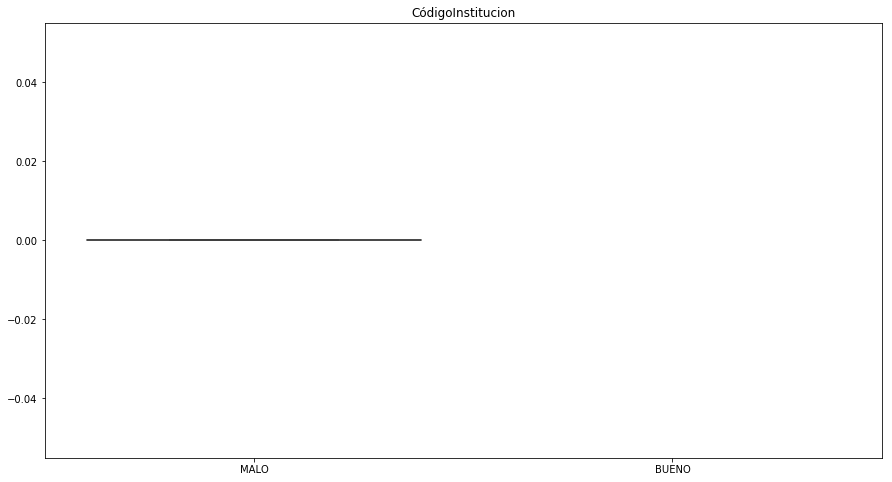

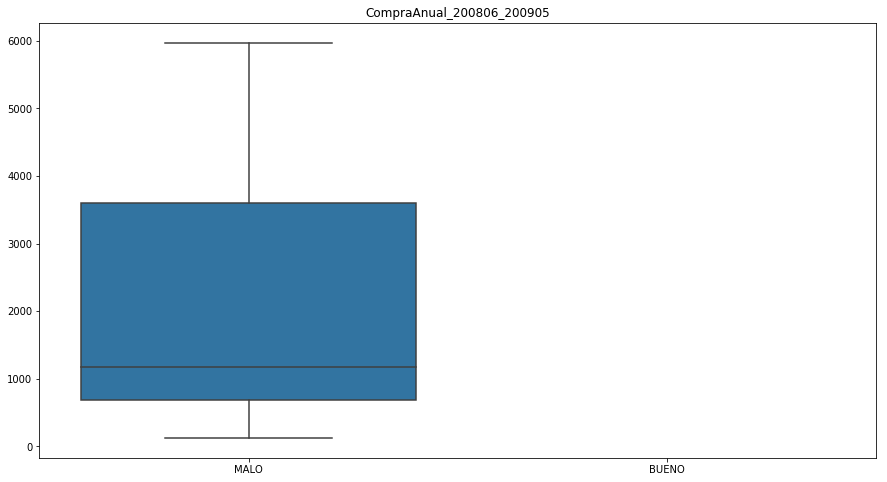

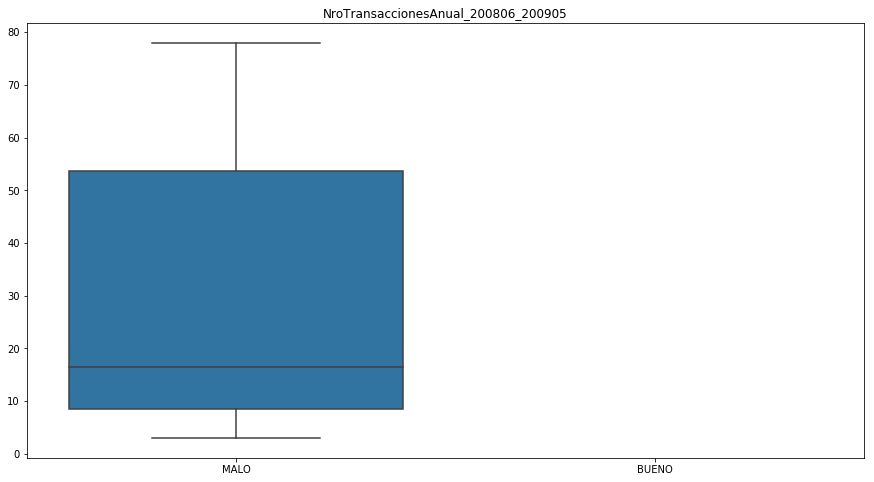

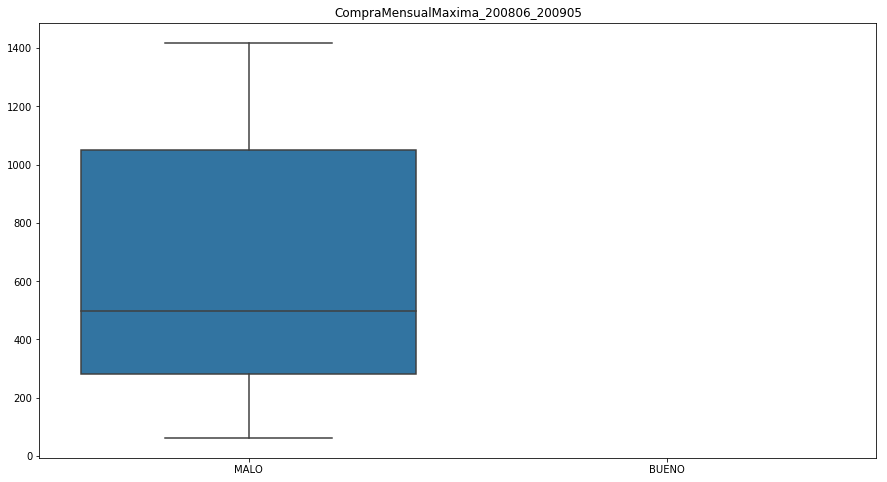

In [30]:
for cat in feature_columns["numerical"]:
  
    plt.figure(figsize=(15,8))
    x=pd.concat([Train_Balanceado.loc[Train_Balanceado["Flag_Cliente"]=="MALO",cat],
          Train_Balanceado.loc[Train_Balanceado["Flag_Cliente"]=="BUENO",cat]],axis=1)
    x.columns=["MALO","BUENO"]
    sns.boxplot(data=x )
    plt.title(cat)
    plt.show()
    import gc
    gc.collect()


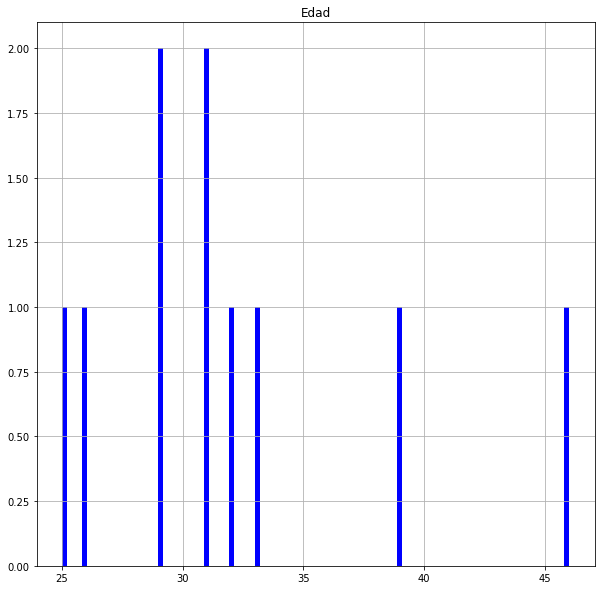

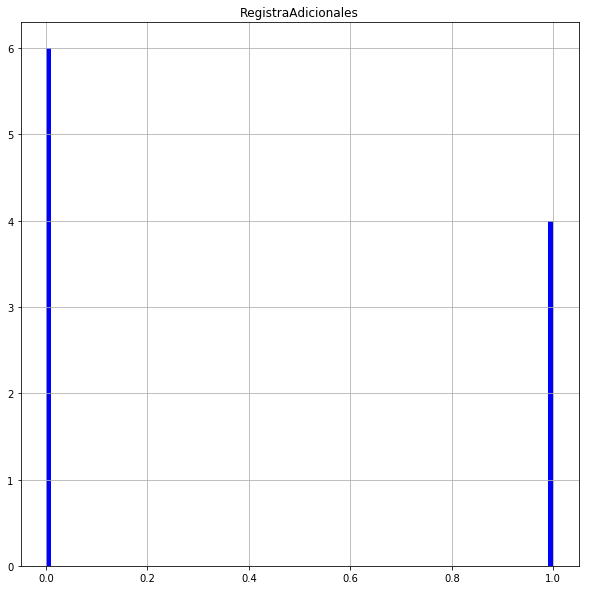

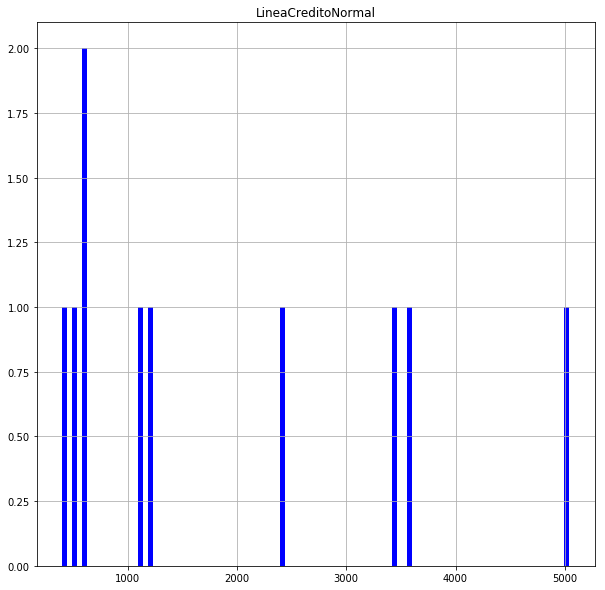

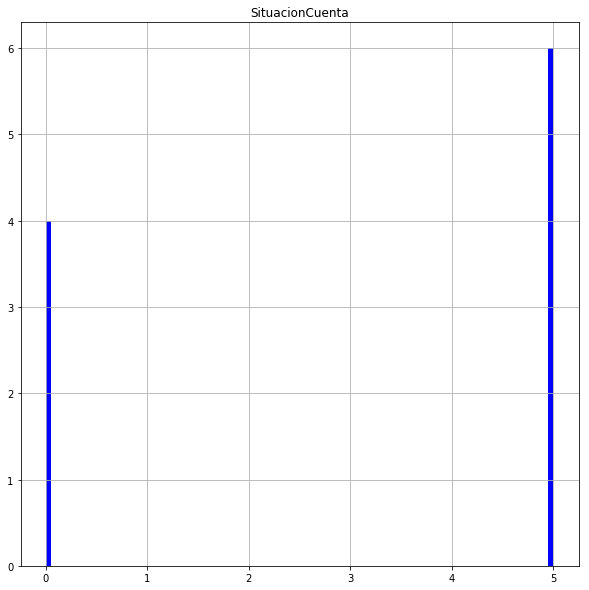

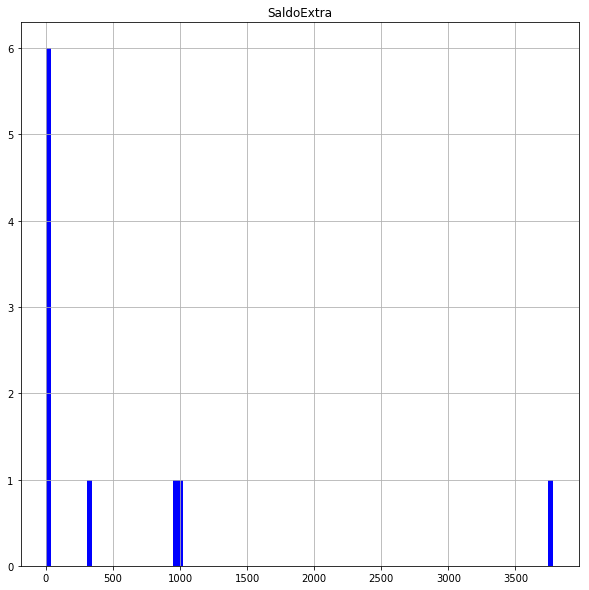

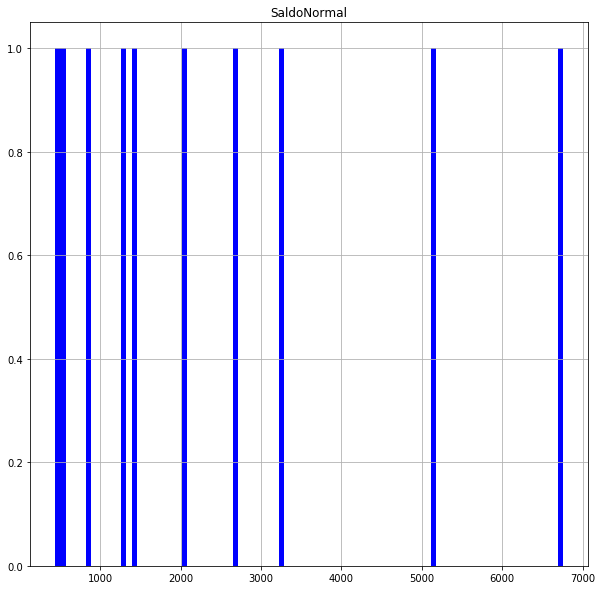

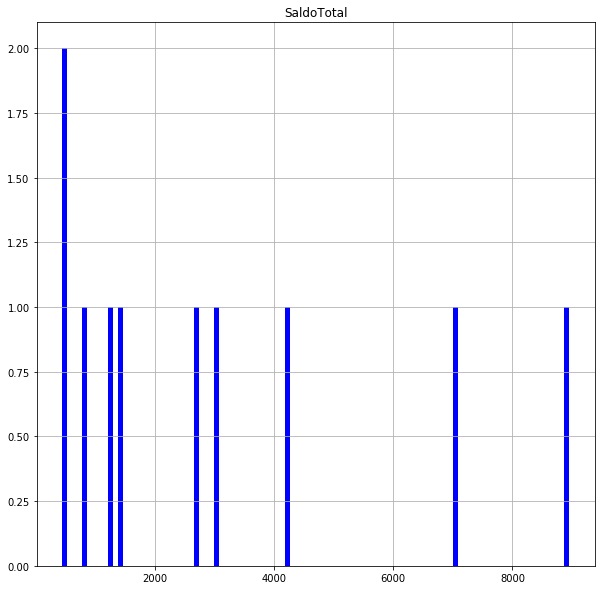

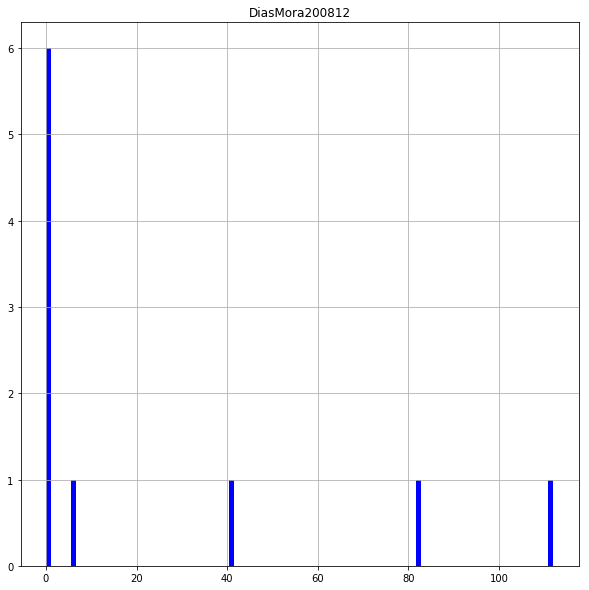

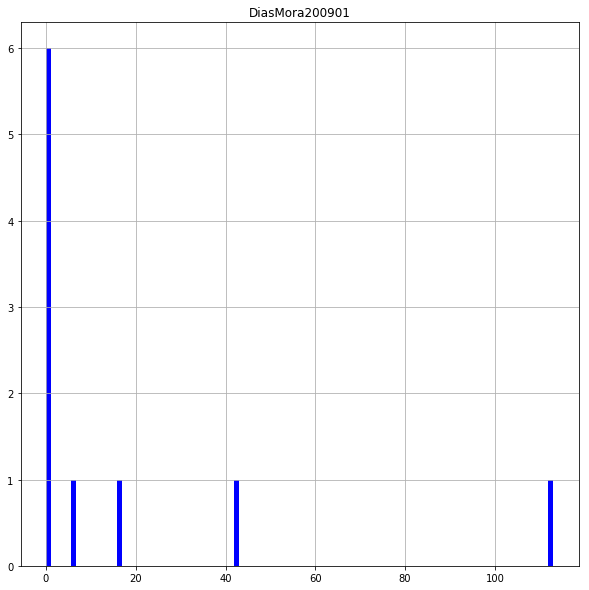

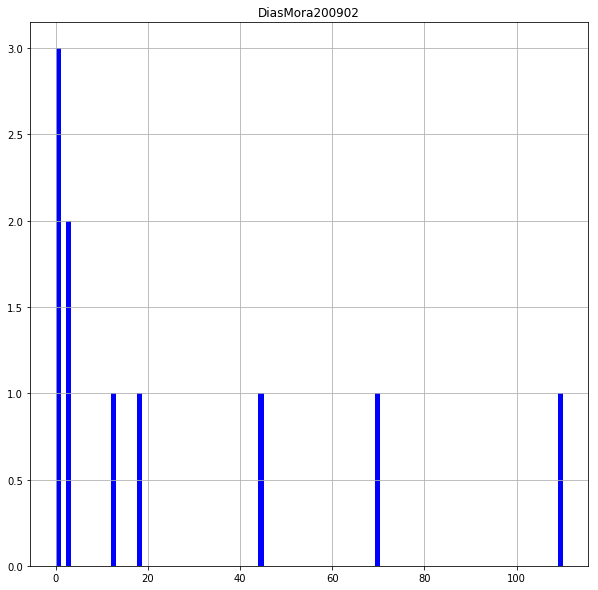

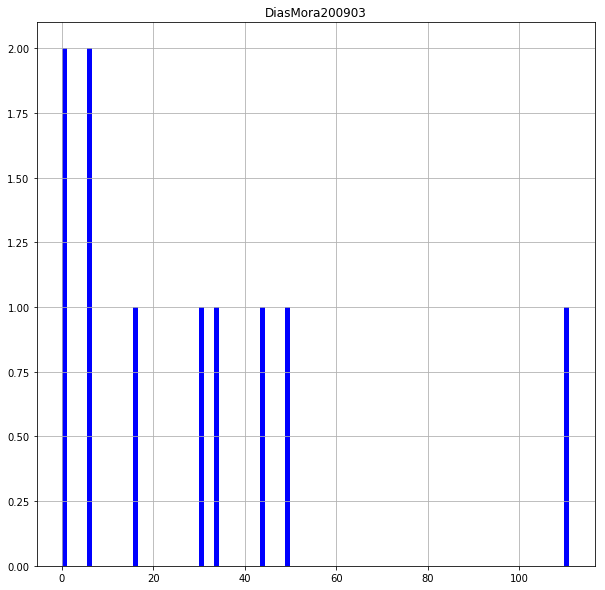

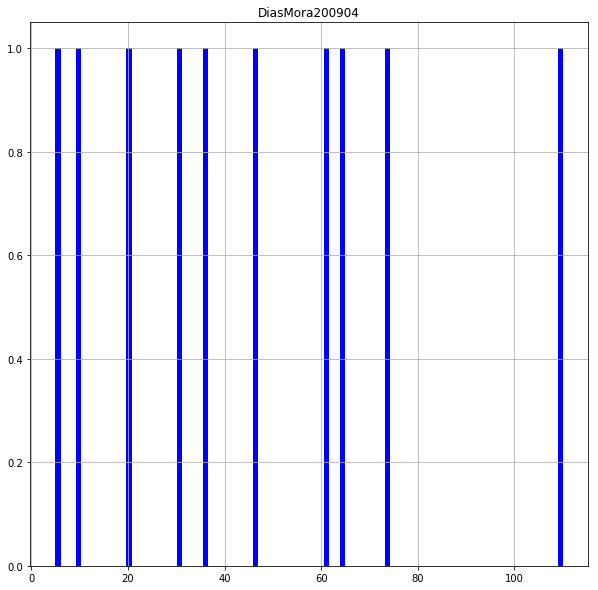

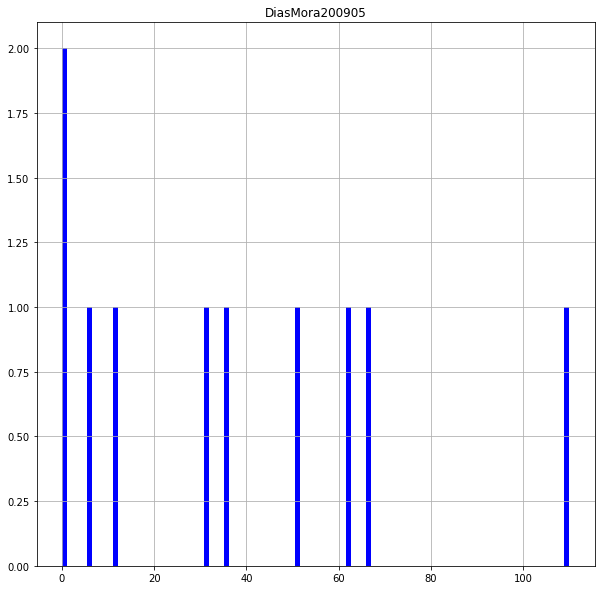

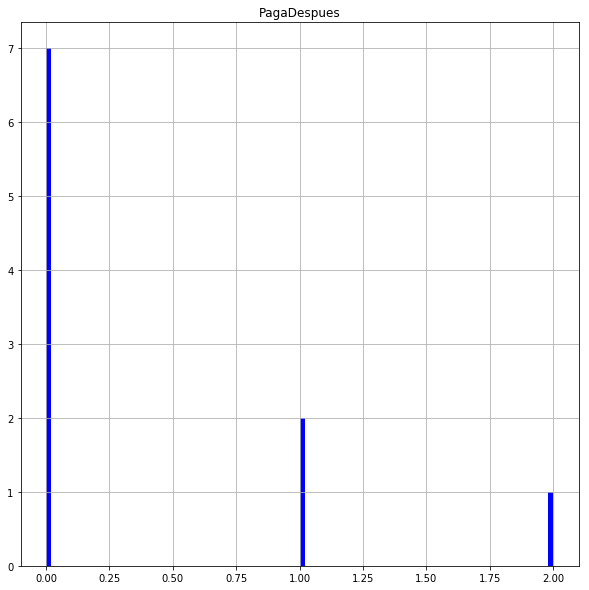

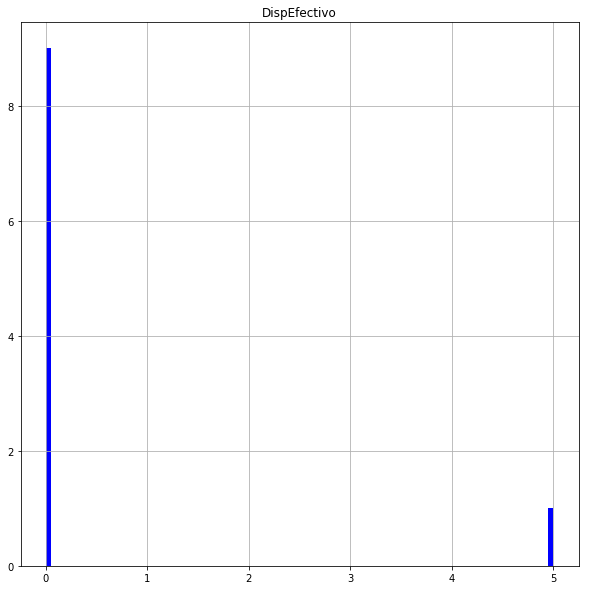

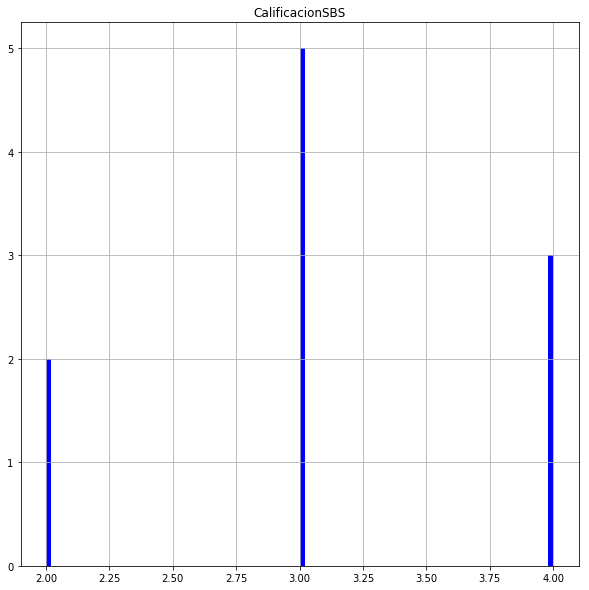

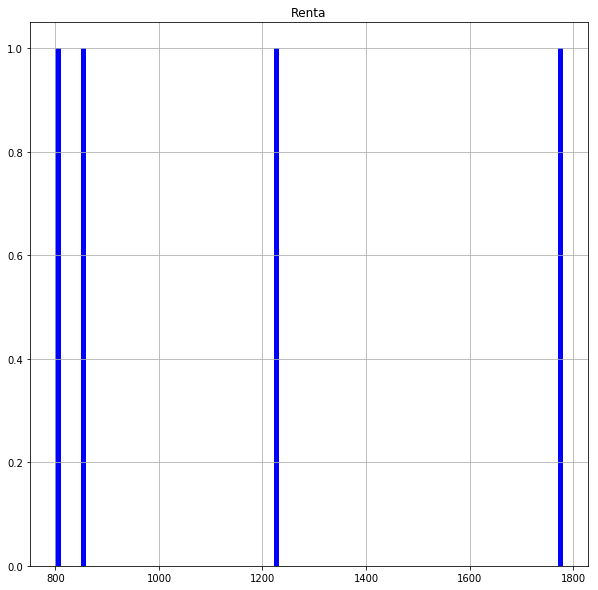

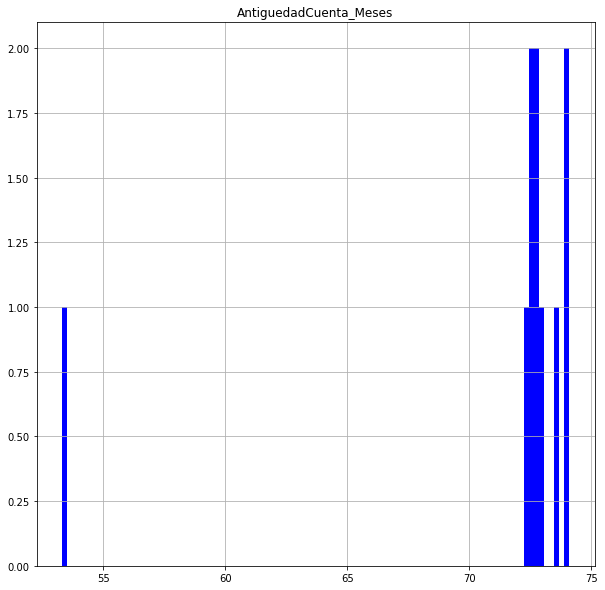

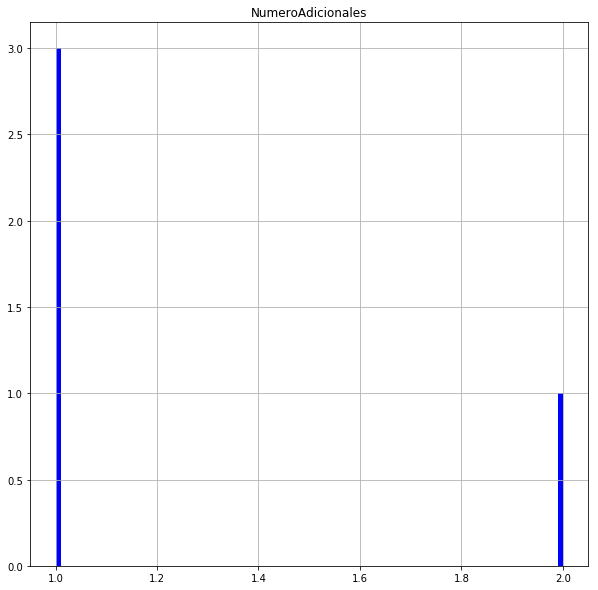

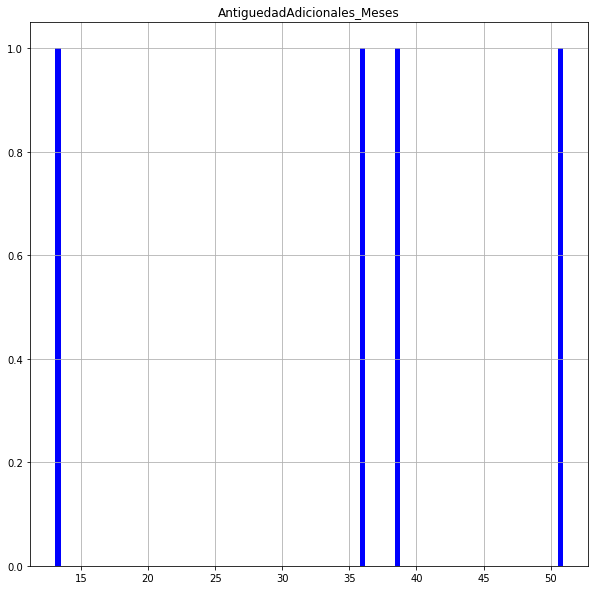

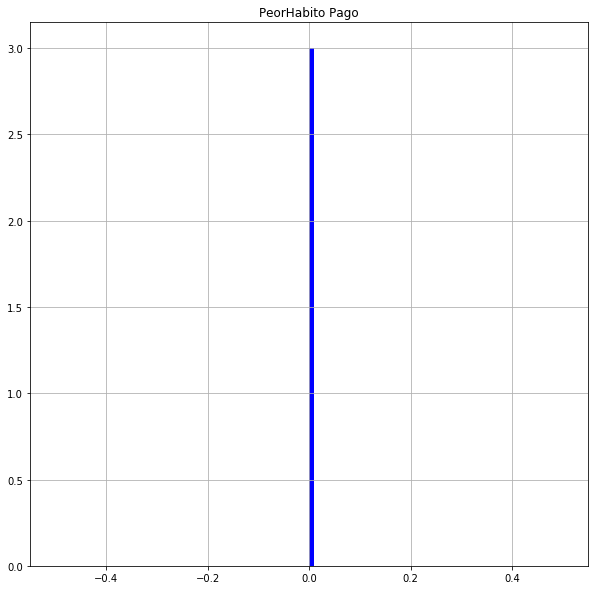

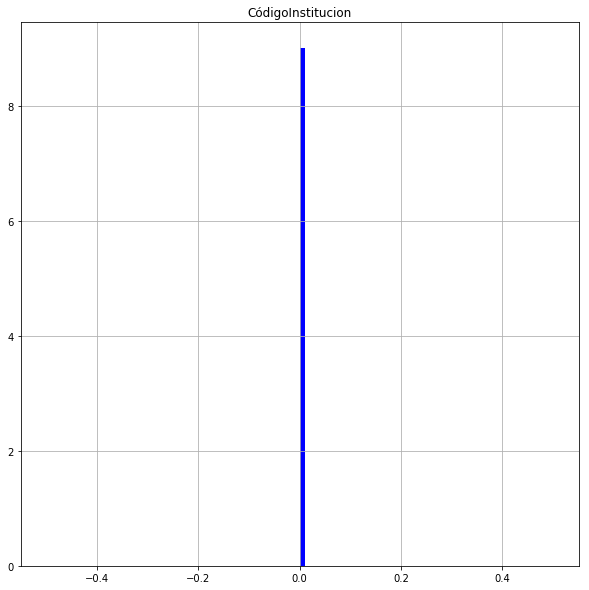

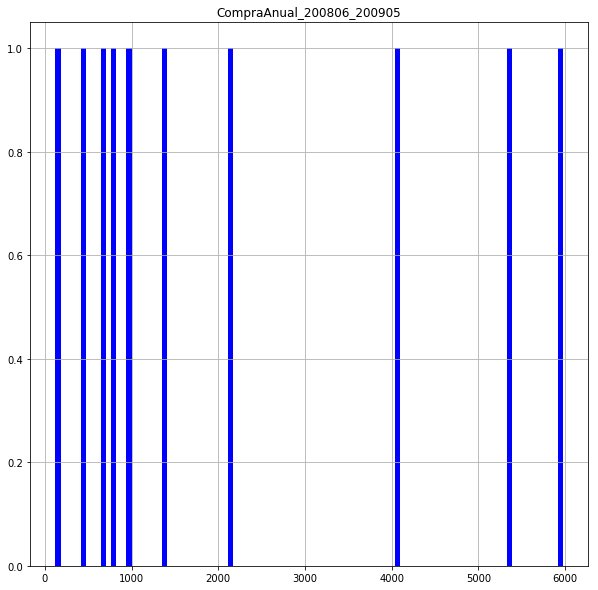

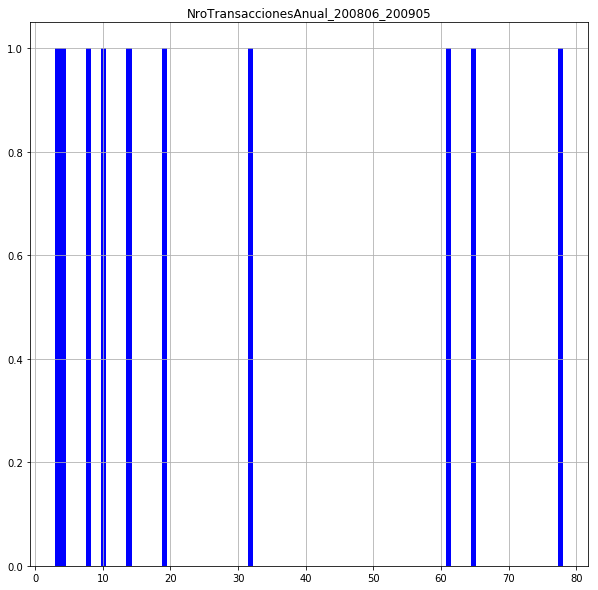

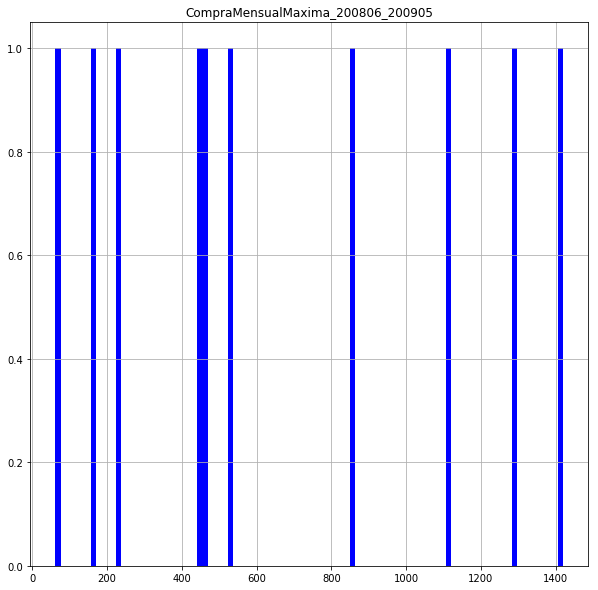

In [31]:
for cat in feature_columns["numerical"]:
    #plt.figure(figsize=(15,8))
    #sns.distplot(Train_Balanceado[cat], kde=False, rug=True)
    Train_Balanceado[cat].hist(figsize=(10,10),color="blue",bins=100) #####HISTOGRAMA
    plt.title(cat)
    plt.show()
    import gc
    gc.collect()

In [32]:
import gc
gc.collect()

0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


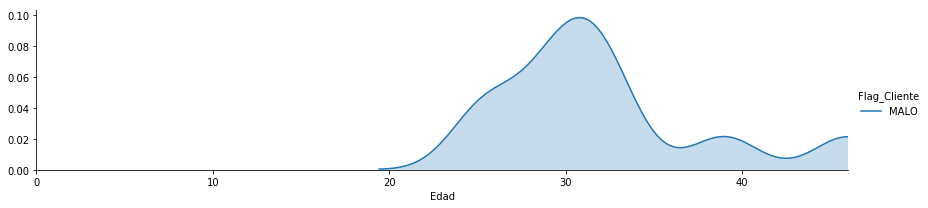

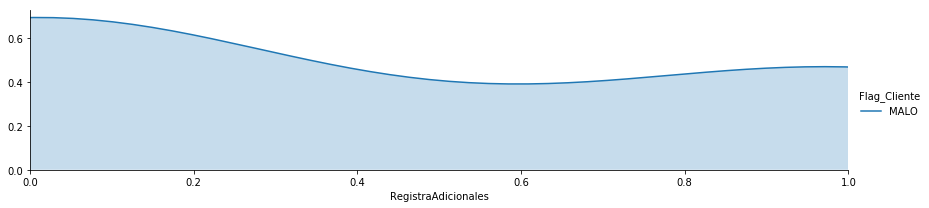

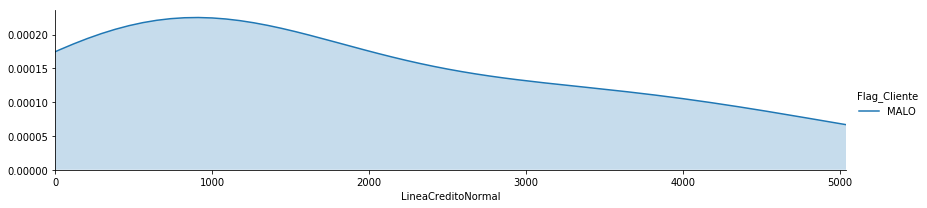

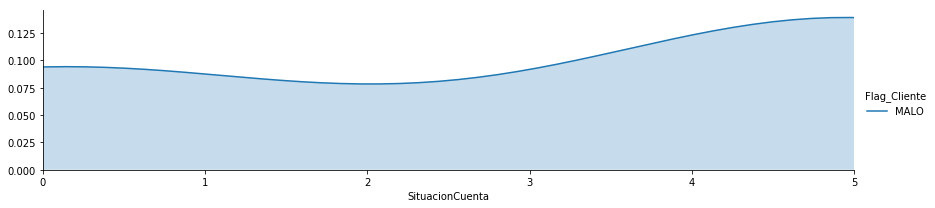

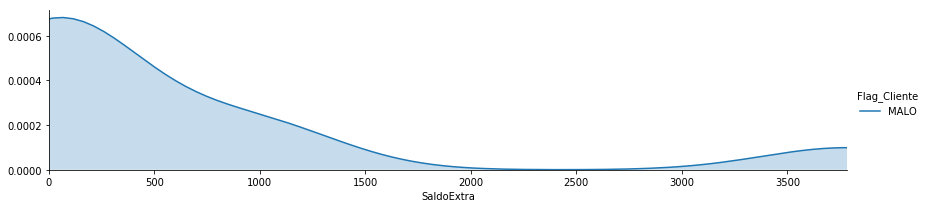

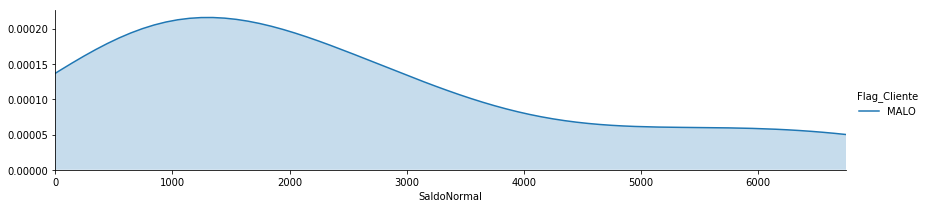

In [33]:
for cat in feature_columns["numerical"][0:6]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4) #MULTIGRAFICO
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

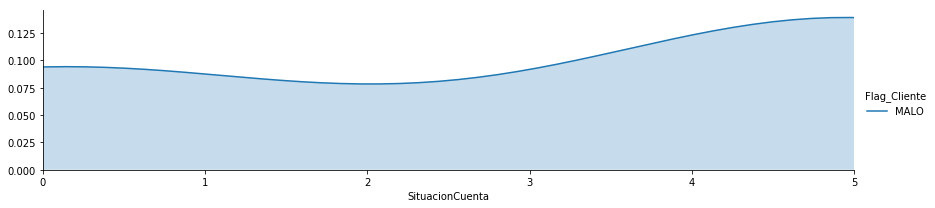

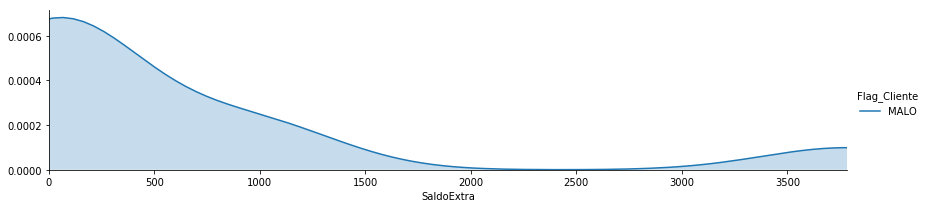

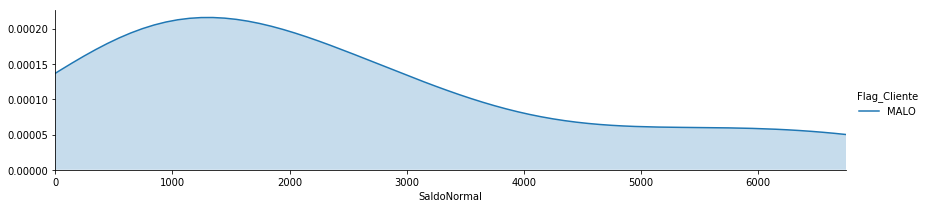

In [37]:
for cat in feature_columns["numerical"][3:6]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

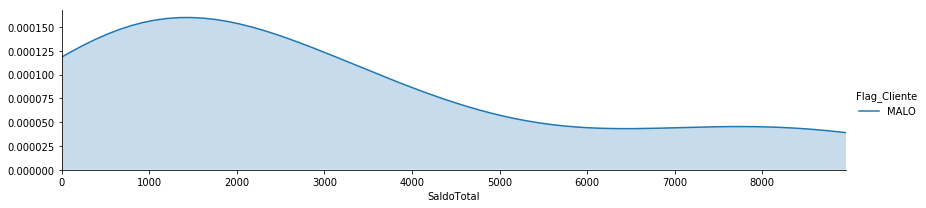

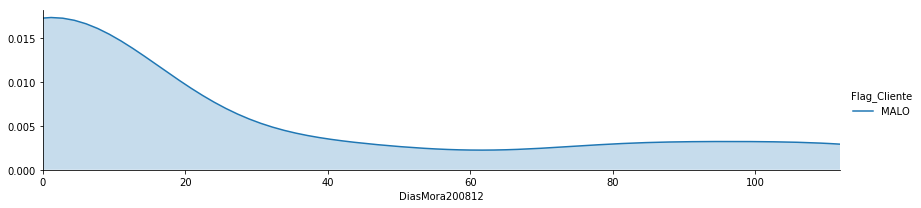

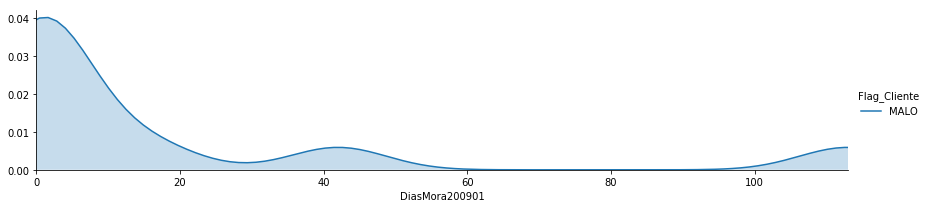

In [38]:
for cat in feature_columns["numerical"][6:9]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B76D82AC8>]],
      dtype=object)

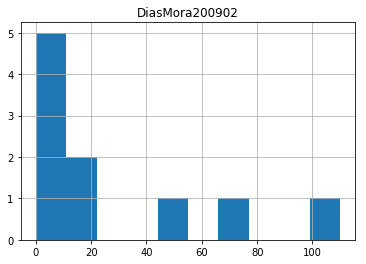

In [39]:
Train_Balanceado[feature_columns["numerical"][9:10]].hist()

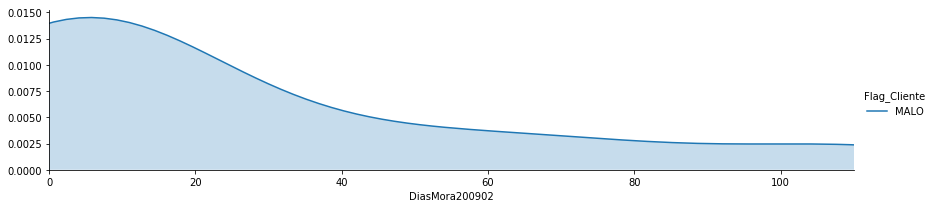

In [40]:
for cat in feature_columns["numerical"][9:10]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

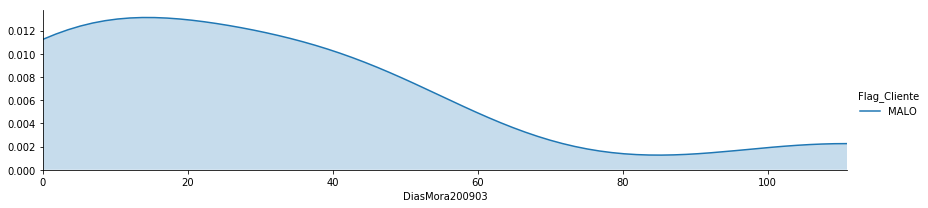

In [41]:
#
for cat in feature_columns["numerical"][10:11]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

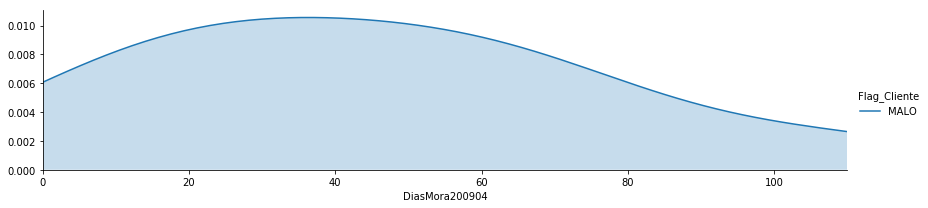

In [42]:
for cat in feature_columns["numerical"][11:12]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

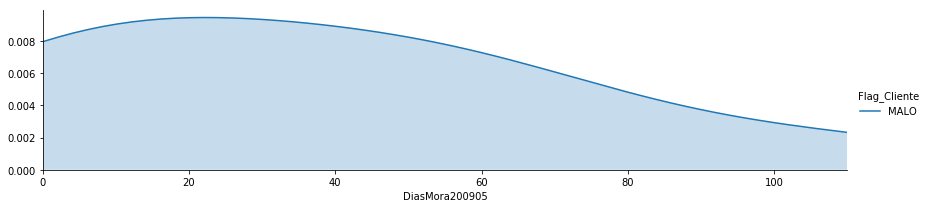

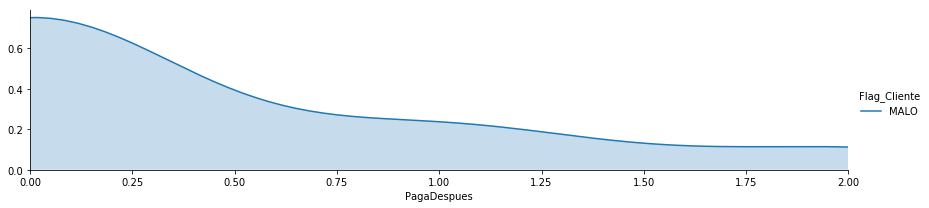

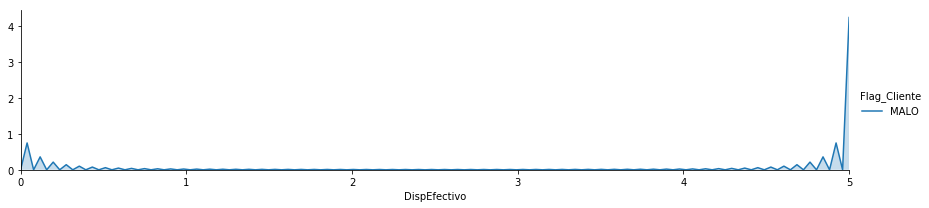

In [43]:
for cat in feature_columns["numerical"][12:15]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

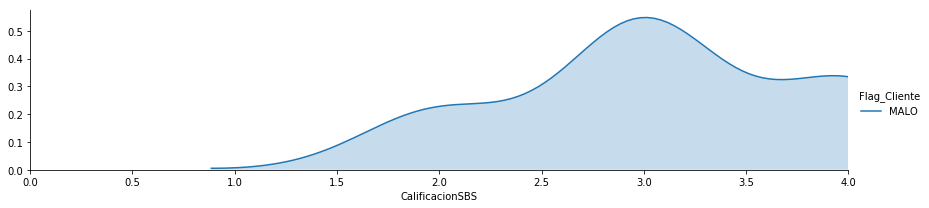

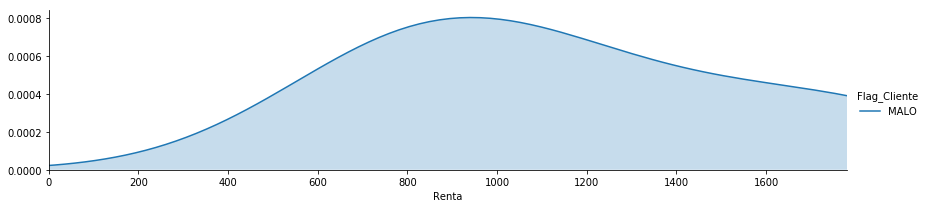

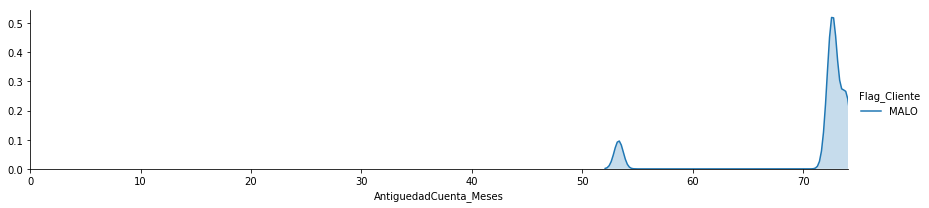

In [44]:
for cat in feature_columns["numerical"][15:18]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\artist.py:913: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  return func(v)


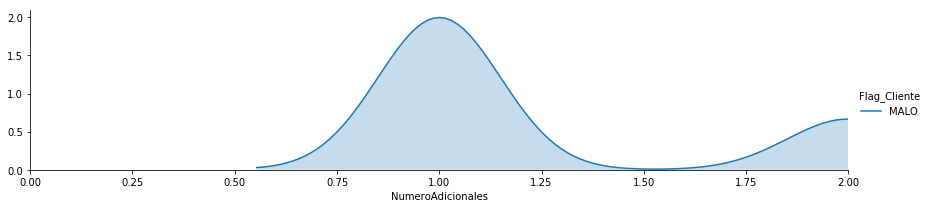

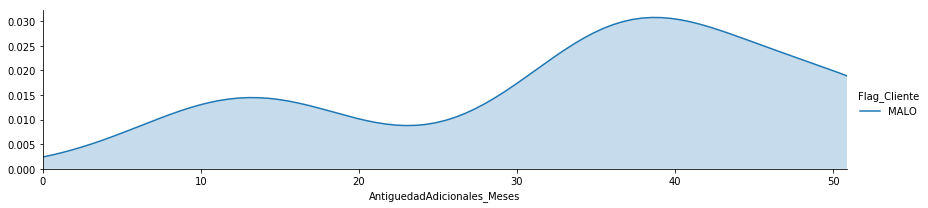

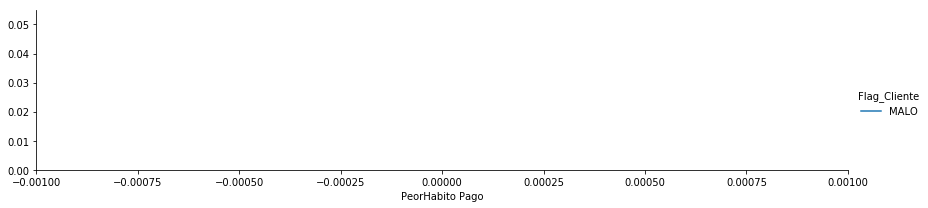

In [45]:
for cat in feature_columns["numerical"][18:21]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

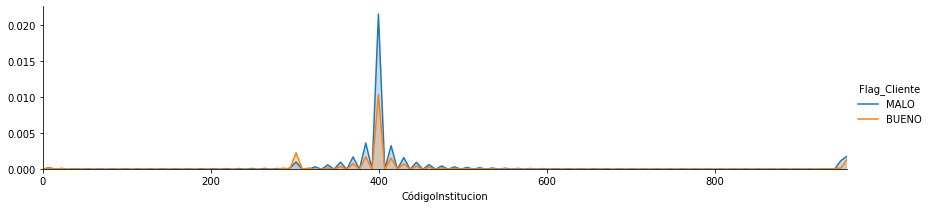

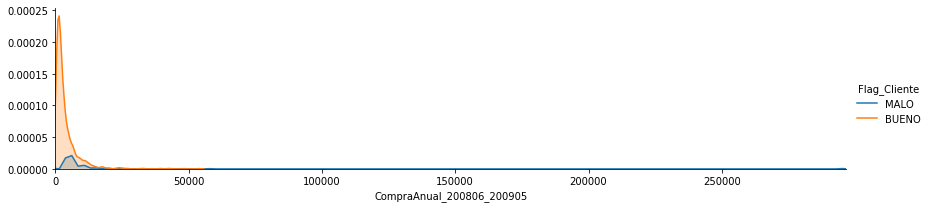

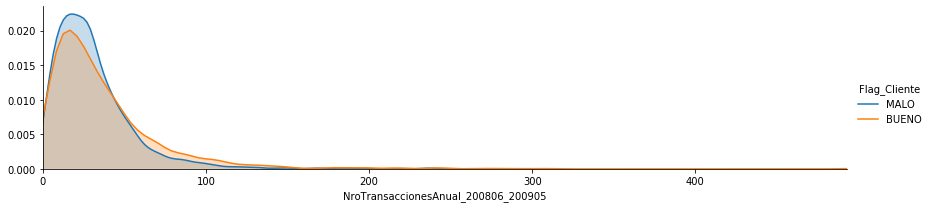

In [0]:
for cat in feature_columns["numerical"][21:24]:
  a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
  a.map(sns.kdeplot, cat, shade= True )
  a.set(xlim=(0 , Train_Balanceado[cat].max()))
  a.add_legend()
  gc.collect()
  #plt.show()
  #print('Skew for train data:',Train_Balanceado.Renta.skew())
  del a
  gc.collect()

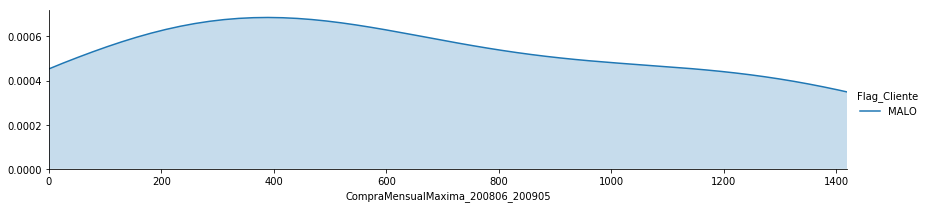

In [46]:
for cat in feature_columns["numerical"][24:]:
    a = sns.FacetGrid(Train_Balanceado[[cat,"Flag_Cliente"]], hue = 'Flag_Cliente', aspect=4)
    a.map(sns.kdeplot, cat, shade= True )
    a.set(xlim=(0 , Train_Balanceado[cat].max()))
    a.add_legend()
    gc.collect()
      #plt.show()
      #print('Skew for train data:',Train_Balanceado.Renta.skew())
    del a
    gc.collect()

In [47]:
Train_Balanceado[feature_columns["numerical"][24:]]

,CompraMensualMaxima_200806_200905
0,1418.70
1,468.00
2,1113.46
3,526.30
4,225.26
5,61.80
6,859.00
7,1289.00
8,451.13
9,160.14


# NULOS


In [28]:
#Creamos una función:
def num_missing(x):
    return sum(x.isnull()) 

In [29]:
 ##devuelve la cantidad de todos los elementos nulos de una funcion
#Aplicamos por columna:
#Creamos una función:
def num_missing(x):
    return sum(x.isnull()) 
print ("Valores perdidos por columna")
print (Train_Balanceado.apply(num_missing, axis=0)) #axis = 0, columna, num_mising para cada columna cuenta los nulos  
print(Train_Balanceado.shape) #tamaño

Valores perdidos por columna
Cliente                                0
Edad                                   0
Renta                                  6
Sexo                                   0
EstadoCivil                            0
NivelSocioEconomico                    0
Departamento                           0
AntiguedadCuenta_Meses                 0
RegistraAdicionales                    0
NumeroAdicionales                      6
AntiguedadAdicionales_Meses            6
LineaCreditoNormal                     0
SituacionCuenta                        0
PromediodePagos                        0
SaldoExtra                             0
SaldoNormal                            0
SaldoTotal                             0
HabitodePago1                          0
HabitodePago2                          0
HabitodePago3                          0
HabitodePago4                          0
HabitodePago5                          0
HabitodePago6                          0
HabitodePago7               

In [50]:
da = {"uno": [2,3,None,4], "dos":[4,None,2,2]}
dat = pd.DataFrame(da)
MEAN = np.mean(list(dat["uno"].dropna())+ list(dat["dos"].dropna()))
dat["uno"] = dat["uno"].fillna(value = MEAN)
dat["dos"] = dat["dos"].fillna(value = MEAN)
dat

,uno,dos
0,2.000000,4.000000
1,3.000000,2.833333
2,2.833333,2.000000
3,4.000000,2.000000


In [30]:
#RELLENO CADA ESPACIO FALTANTE EN BASE AL PROMEDIO DE LOS VALORES NO FALTANTES
#RENTA
mean = np.mean(list(Train_Balanceado["Renta"].dropna())+list(Test["Renta"].dropna())) #obtiene la media sin considerar a los NULL
Train_Balanceado["Renta"]=Train_Balanceado["Renta"].fillna(value = mean) 
Test["Renta"]=Test["Renta"].fillna(value = mean)

#COMPRA MENSUAL MAXIMA
mean =np.mean(list(Train_Balanceado["CompraMensualMaxima_200806_200905"].dropna())+list(Test["CompraMensualMaxima_200806_200905"].dropna()))
Train_Balanceado["CompraMensualMaxima_200806_200905"]=Train_Balanceado["CompraMensualMaxima_200806_200905"].fillna(value=mean)
Test["CompraMensualMaxima_200806_200905"]=Test["CompraMensualMaxima_200806_200905"].fillna(value=mean)

#ANTIGUEDAD
mean =np.mean(list(Train_Balanceado["AntiguedadAdicionales_Meses"].dropna())+list(Test["AntiguedadAdicionales_Meses"].dropna()))
Train_Balanceado["AntiguedadAdicionales_Meses"]=Train_Balanceado["AntiguedadAdicionales_Meses"].fillna(value=mean)
Test["AntiguedadAdicionales_Meses"]=Test["AntiguedadAdicionales_Meses"].fillna(value=mean)
###############################################################################################################

for cat in ["NumeroAdicionales"] + ["HabitodePago4"]+["HabitodePago5"]+["HabitodePago6"]+["HabitodePago7"]+["HabitodePago8"]+["PeorHabito Pago"]+["DiasMora200812"]+["CódigoInstitucion"]+["CompraAnual_200806_200905"]+["NroTransaccionesAnual_200806_200905"]:
  #mode=mode(list(Train_Balanceado[cat].dropna())+list(Test[cat].dropna()))
    mode=pd.DataFrame(np.asarray( list(Train_Balanceado[cat].dropna())+list(Test[cat].dropna()))).mode().values
    Train_Balanceado[cat]=Train_Balanceado[cat].fillna(value=Train_Balanceado[cat].value_counts().index[0])
    Test[cat]=Test[cat].fillna(value=Test[cat].value_counts().index[0])
       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

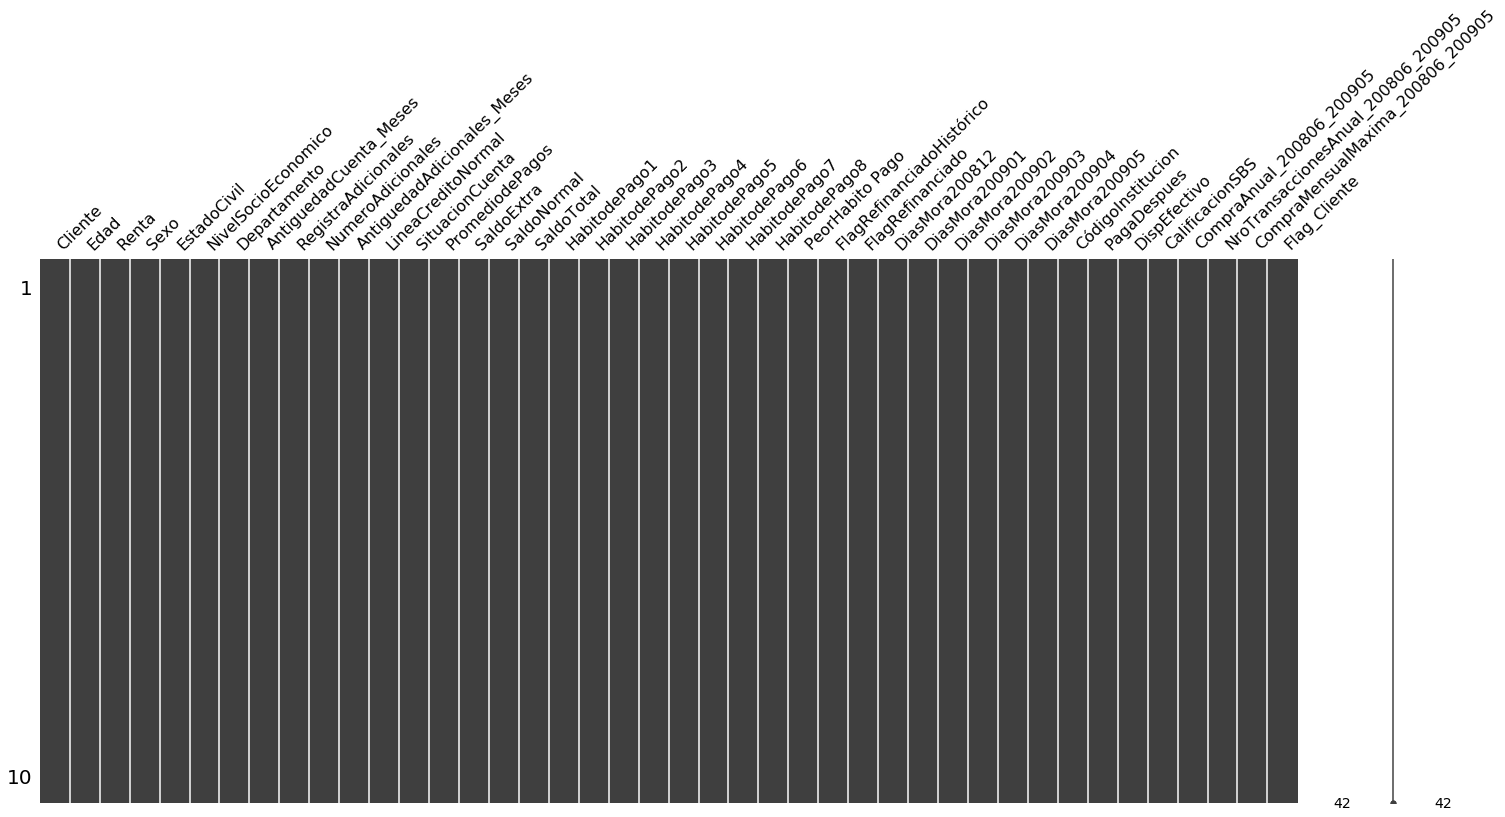

In [31]:
import missingno as msno
msno.matrix(Test) ##verifica espacios vacios

In [3]:
am = ['peru', 'china', 'china', 'para','peru']
ver = preprocessing.LabelEncoder() #etiqueta

ver.fit(am)

ar = [x for x in ver.classes_]

for i in ver.transform(['peru', 'para']): print(i)

for i in ver.inverse_transform([0,1,2]): print(i)

2
1
china
para
peru


In [32]:
###Rellenando nulos a columnas categoricas y a la vez tranformando en etiquetas
test=Test.copy()
train=Train_Balanceado.copy() #nuevas datas
for l in feature_columns["categorical"] +["Flag_Cliente"]: #columnas categoricas + flag_cliente    
    print(l)    
    
    me = preprocessing.LabelEncoder() #los etiqueta
    
    train.loc[train[l].notnull(),l]=train.loc[train[l].notnull(),l].astype(str)
    
    test.loc[test[l].notnull(),l]=test.loc[test[l].notnull(),l].astype(str)

    #evalua la columna
    me.fit(list(train[l].dropna())+list(test[l].dropna()))
    
    train.loc[~train[l].isnull(),l]=me.transform(train.loc[~train[l].isnull(),l])

    test.loc[~test[l].isnull(),l]=me.transform(test.loc[~test[l].isnull(),l])
test=test.drop('Flag_Cliente', axis=1)

Sexo
EstadoCivil
NivelSocioEconomico
Departamento
PromediodePagos
HabitodePago1
HabitodePago2
HabitodePago3
HabitodePago4
HabitodePago5
HabitodePago6
HabitodePago7
HabitodePago8
FlagRefinanciadoHistórico
FlagRefinanciado
Flag_Cliente


In [33]:
test

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,...,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905
14,24448,28,686.000000,0,0,2,2,72.57,0,1.0,...,6,0,6,0.0,1,6,4,619.78,17.0,205.550000
5,7355,43,2957.000000,1,1,2,2,73.67,0,1.0,...,34,64,6,0.0,0,0,3,1806.98,37.0,1077.280000
4,6536,35,1333.454545,1,1,4,1,73.70,0,1.0,...,34,36,67,0.0,1,2,2,459.10,3.0,439.200000
17,26305,32,1333.454545,0,1,2,2,72.43,1,1.0,...,0,15,46,0.0,1,1,2,894.49,36.0,145.520000
8,15541,40,1333.454545,1,1,4,3,58.63,0,1.0,...,1,31,62,0.0,0,0,2,213.14,15.0,129.500000
7,14111,31,550.000000,0,1,3,2,73.30,0,1.0,...,26,25,56,400.0,0,1,3,658.97,17.0,305.500000
19,30956,30,948.000000,1,1,2,2,72.07,0,1.0,...,16,46,0,0.0,0,1,2,2962.41,15.0,569.703158
12,23244,24,2050.000000,0,1,1,2,72.67,0,1.0,...,6,36,0,0.0,3,3,4,2182.50,23.0,482.900000
0,514,35,1703.000000,1,1,4,0,74.13,0,1.0,...,0,0,0,0.0,0,0,0,133.20,8.0,66.000000
15,24591,30,1114.000000,1,1,2,2,72.57,1,1.0,...,31,0,1,0.0,2,0,1,2962.41,15.0,1400.120000


In [34]:
###stopppp
no_usar=["Flag_Cliente"]+["Cliente"]
features=[x for x in train.columns if x not in no_usar]
cat_ind=[features.index(x) for x in feature_columns["categorical"]]

In [44]:
test=test.drop('Flag_Cliente', axis=1)

KeyError: "['Flag_Cliente'] not found in axis"

# **APLICANDO EL MODELO LIGHT GBM CON CROSS VALIDATION**

In [45]:
####MUESTRA PARA MEJOR COMPRENSION:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
            {'a': 100, 'b': 200, 'c': 300, 'd': 400},
            {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df = pd.DataFrame(mydict)
df.loc[[0,2],"a"] ###iloc[fila, columna]

0       1
2    1000
Name: a, dtype: int64

In [46]:
test.drop("TARGET_FOLD1", axis = 1)

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,...,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905
14,24448,28,686.000000,0,0,2,2,72.57,0,1.0,...,6,0,6,0.0,1,6,4,619.78,17.0,205.550000
5,7355,43,2957.000000,1,1,2,2,73.67,0,1.0,...,34,64,6,0.0,0,0,3,1806.98,37.0,1077.280000
4,6536,35,1333.454545,1,1,4,1,73.70,0,1.0,...,34,36,67,0.0,1,2,2,459.10,3.0,439.200000
17,26305,32,1333.454545,0,1,2,2,72.43,1,1.0,...,0,15,46,0.0,1,1,2,894.49,36.0,145.520000
8,15541,40,1333.454545,1,1,4,3,58.63,0,1.0,...,1,31,62,0.0,0,0,2,213.14,15.0,129.500000
7,14111,31,550.000000,0,1,3,2,73.30,0,1.0,...,26,25,56,400.0,0,1,3,658.97,17.0,305.500000
19,30956,30,948.000000,1,1,2,2,72.07,0,1.0,...,16,46,0,0.0,0,1,2,2962.41,15.0,569.703158
12,23244,24,2050.000000,0,1,1,2,72.67,0,1.0,...,6,36,0,0.0,3,3,4,2182.50,23.0,482.900000
0,514,35,1703.000000,1,1,4,0,74.13,0,1.0,...,0,0,0,0.0,0,0,0,133.20,8.0,66.000000
15,24591,30,1114.000000,1,1,2,2,72.57,1,1.0,...,31,0,1,0.0,2,0,1,2962.41,15.0,1400.120000


In [40]:

kf_previo=StratifiedKFold(n_splits=5,random_state=256,shuffle=True) #divide en muestras, 5, SEMILLA 256

i=1

r=[]

importancias=[]

for train_index,test_index in kf_previo.split(train,train['Flag_Cliente']):
    #libreria lightGBM, train_index[train_index,features] , train.loc[train_index,'Flag_Cliente'] "solo toma flag_cliente" 
    lgb_train = lgb.Dataset(train.loc[train_index,features].values,train.loc[train_index,'Flag_Cliente'].values.ravel())
    lgb_eval = lgb.Dataset(train.loc[test_index,features].values,train.loc[test_index,'Flag_Cliente'].values.ravel(), reference=lgb_train)
    #PARAMETROS
    params = {
         'task': 'train', #define que es tarea de entrenamiento
        'boosting_type': 'gbdt', #tipo de algoritmo gdbt:gradient boosting decision tree
        'objective': 'binary', #metrica, clasificacion binaria
        'metric': { 'auc'}, #Auc area bajo la curva
        "max_depth":4, #maximo de ramas
        "num_leaves":10, #default 31
        'learning_rate': 0.1,
        "min_child_samples": 100,
        'feature_fraction': 0.5,
         "bagging_freq":1,
        'bagging_fraction': 0.9, #aceleracion del entrenamiento
        "lambda_l1":1,
        "lambda_l2":1,#regularizacion
       # "scale_pos_weight":30,

        'verbose': 1 #representacion    
    }

    #le asignalas caracteristicas para el entrenamiento
    lgbm3 = lgb.train(
        params,lgb_train,
        num_boost_round=13100,
        valid_sets=lgb_eval,
        early_stopping_rounds=50,
        verbose_eval=25, #CADA 25 EVALUACIÓN, MUESTRA
        categorical_feature=cat_ind)
    
    test["TARGET_FOLD"+str(i)]=lgbm3.predict(test[features].values, num_iteration=lgbm3.best_iteration)
    
    importancia=lgbm3.feature_importance(importance_type="gain")
    
    importancias.append(importancia)
    
    test["TARGET_FOLD"+str(i)]=lgbm3.predict(test[features].values, num_iteration=lgbm3.best_iteration)
    
    importancia=lgbm3.feature_importance(importance_type="gain")
    
    print ("Fold_"+str(i))
    a= (roc_auc_score(train.loc[test_index,'Flag_Cliente'],lgbm3.predict(train.loc[test_index,features].values, num_iteration=lgbm3.best_iteration)))
    
    #train.loc[test_index,"probabilidad"]=lgbm3.predict(train.loc[test_index,features].values, num_iteration=lgbm3.best_iteration)
    
    
    r.append(a)
    print (a)
    print ("")
    
    i=i+1

print ("mean: "+str(np.mean(np.array(r))))
print ("std: "+str(np.std(np.array(r))))

Training until validation scores don't improve for 50 rounds
[25]	valid_0's auc: 1
[50]	valid_0's auc: 1
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Fold_1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 12, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [2, 3, 4, 5, 12, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [0]:
w=[x for x in test.columns if 'FOLD' in x]

test['Flag_Cliente']=test[w].mean(axis=1)


In [0]:
test.head(5)

,Cliente,Edad,Renta,Sexo,EstadoCivil,NivelSocioEconomico,Departamento,AntiguedadCuenta_Meses,RegistraAdicionales,NumeroAdicionales,AntiguedadAdicionales_Meses,LineaCreditoNormal,SituacionCuenta,PromediodePagos,SaldoExtra,SaldoNormal,SaldoTotal,HabitodePago1,HabitodePago2,HabitodePago3,HabitodePago4,HabitodePago5,HabitodePago6,HabitodePago7,HabitodePago8,PeorHabito Pago,FlagRefinanciadoHistórico,FlagRefinanciado,DiasMora200812,DiasMora200901,DiasMora200902,DiasMora200903,DiasMora200904,DiasMora200905,CódigoInstitucion,PagaDespues,DispEfectivo,CalificacionSBS,CompraAnual_200806_200905,NroTransaccionesAnual_200806_200905,CompraMensualMaxima_200806_200905,TARGET_FOLD1,TARGET_FOLD2,TARGET_FOLD3,TARGET_FOLD4,TARGET_FOLD5,Flag_Cliente
573,676110,78,893.000000,0,2,4,6,93.30,1,1.0,39.230000,600,5,4,0,744,744,6,3,5,3,2,1,2,2,0.0,0,0,0.0,11,39,11,41,72,0.0,1,3,2,1897.45,47.0,502.13,0.785192,0.813658,0.951652,0.800374,0.800857,0.830347
1592,1747726,29,2533.777403,0,2,3,7,28.40,0,1.0,25.057718,500,5,5,0,710,710,7,6,3,5,3,2,2,2,0.0,0,0,0.0,16,0,16,46,77,0.0,0,2,3,2196.00,46.0,487.60,0.992067,0.991308,0.997100,0.978197,0.987286,0.989192
3675,1742315,47,2547.000000,0,2,2,7,28.63,0,1.0,25.057718,1000,5,7,0,834,834,7,6,3,5,3,5,3,5,0.0,1,1,0.0,26,0,26,56,0,0.0,0,1,0,2705.66,40.0,763.78,0.687809,0.729796,0.509461,0.551191,0.393117,0.574275
2774,2137934,31,796.000000,1,2,3,7,11.60,0,1.0,25.057718,500,5,7,0,443,443,7,6,3,5,6,6,3,4,0.0,0,0,1.0,1,0,31,61,62,0.0,0,0,3,958.85,20.0,250.60,0.999217,0.997560,0.999712,0.997943,0.999130,0.998713
2134,1962156,30,1435.000000,0,2,3,7,18.63,1,1.0,12.030000,700,5,6,0,911,911,6,3,3,6,6,6,3,1,0.0,0,0,31.0,0,0,1,31,62,0.0,2,2,2,1137.04,45.0,270.82,0.998976,0.997831,0.999672,0.996865,0.995019,0.997673


In [0]:
roc_auc_score(Test['Flag_Cliente'],test['Flag_Cliente'])

0.9802159323763987

# **APLICANDO EL MODELO DE REGRESIÓN LOGÍSTICA CON CROSS VALIDATION**

In [0]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model_rlog = LogisticRegression(C=5, max_iter= 500, random_state=0, n_jobs = 4, penalty = 'l1') 

In [0]:

kf_previo=StratifiedKFold(n_splits=5,random_state=256,shuffle=True)

i=1

r=[]

importancias=[]

for train_index,test_index in kf_previo.split(train,train['Flag_Cliente']):

    model_rlog.fit(train.loc[train_index,features], train.loc[train_index,'Flag_Cliente'])
    model = model_rlog
    test["TARGET_FOLD_R"]=model.predict_proba(test[features])[:,1]
    print ("Fold_"+str(i))
    a= (roc_auc_score(train.loc[test_index,'Flag_Cliente'],model.predict_proba(train.loc[test_index,features])[:,1]))
    r.append(a)
    print (a)
    print ("")
    i=i+1

print ("mean: "+str(np.mean(np.array(r))))
print ("std: "+str(np.std(np.array(r))))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Fold_1
0.9596984725252926

Fold_2
0.9592541162467765



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Fold_3
0.9568450955983274

Fold_4
0.9504293146924575

Fold_5
0.9657904816623576

mean: 0.9584034961450423
std: 0.004959521257513771


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [0]:
w = [x for x in test.columns if 'FOLD' in x]

Y_predict=test[w].mean(axis=1)


In [0]:
roc_auc_score(Test['Flag_Cliente'],Y_predict)

0.9795516178423521

# **HACIENDO EMSAMBLE DEL MODELO LIGHT GBM Y DE REGRESIÓN LOGÍSTICA**

In [0]:
from scipy import optimize


In [0]:
def scalar1(x):
    return (-1*roc_auc_score(Test['Flag_Cliente'],(test['Flag_Cliente']*(x)+ Y_predict*(1-x))))     

In [0]:

# Left-sided inequality from the first constraint
result = optimize.minimize_scalar(scalar1, bounds = (0,1),method='Bounded')
    

In [0]:
print(result)

     fun: -0.9802248195273557
 message: 'Solution found.'
    nfev: 23
  status: 0
 success: True
       x: 0.9794176438820577


In [0]:
Emsamble_test=(test['Flag_Cliente']*(result.x)+Y_predict*(1-result.x))

In [0]:
roc_auc_score(Test['Flag_Cliente'],Emsamble_test)

0.9802248195273557

In [0]:
print(str(roc_auc_score(Test['Flag_Cliente'],test['Flag_Cliente'])),'--',str(roc_auc_score(Test['Flag_Cliente'],Y_predict)),'--',str(roc_auc_score(Test['Flag_Cliente'],Emsamble_test)))

0.9802159323763987 -- 0.9795516178423521 -- 0.9802248195273557
